# MODELS

In this notebook, we develop models that will be used in further clustering and  statistical analyses. Before delving into in-depth analytical procedures, we prioritize the establishment of the most robust model for each dataset. This approach reinforces the reproducibility and trustworthiness of our research.

We employ Gaussian Mixture Models (GMMs) to represent every feature space within a dataset of a given catalog. This involves experimenting with different numbers of clusters.

For example, in the BATSE's Hardness dimension, we constructed 10 unique models with cluster counts ranging from 1 to 10.
- batse_lgHrd_1G, batse_lgHrd_2G, ... , batse_lgHrd_10G.

For the FERMI's T90-Hrd space, the generated models are:
- fermi_lgT90_1G, fermi_lgT90_2G, ... , fermi_lgT90_10G

In the SWIFT's T90i-Hrd space, the generated models are:
- swift_lgT90i-lgHrd_1G, swift_lgT90i-lgHrd_2G, ... , swift_lgT90i-lgHrd_10G

**Problems**

When we model a dataset using GMM, re-modeling the same dataset with the same parameters using GMM can yield different results. Some of the primary causes include:

- Dataset Variability: GMM parameters stem from the dataset. The presence of outliers can distort the model. Especially, GMMs are vulnerable to the effects of outliers. However, we've incorporated outlier detection mechanisms and have filtered them out during model generation.

- Optimization: We utilize the EM algorithm during the GMM fitting process. The optimization method can sometimes converge to different local maxima based on its initial conditions.

- Model Complexity: As model complexity incrases—be it due to an increased number of components or a more extensive feature set—achieving a stable model becomes challenging. Slight alterations in parameters can lead to significant variations in the outcomes.

**Solution**

To counter the aforementioned challenges, we employ the following approach:

- Models are created multiple times (e.g., 100 times) and the parameters are then averaged.

- The weights and means of the Gaussian components are directly averaged.

- The covariance matrices are averaged using the Riemannian methodology.



-----

In [75]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Importing libraries:

In [76]:
import sys
import numpy as np
import pandas as pd
from typing import List, Union, Optional

# add grbttools to path
sys.path.append("../")

from grbtools import env, data as dt, disp, models as md, analysis as an
from grbtools.gmm import GaussianMixtureModel

logger = env.get_logger()

Notebook settings

In [77]:
# set the seed
np.random.seed(None)

## How many clusters in a model?
N_COMPONENTS_MIN = 1
N_COMPONENTS_MAX = 10

## How many times should we create a model with the same hyper-parameters?
N_TRIALS = 100

Methods

In [78]:
def create_models(df: pd.DataFrame):
    # get catalog name and features
    catalog_name = df.index.name
    features = df.columns

    # create models for each n_components
    for n_components in range(N_COMPONENTS_MIN, N_COMPONENTS_MAX + 1):
        logger.info(f">>> Creating {n_components}G model...")
        an.create_robust_gmm(df, n_components, n_trials=N_TRIALS)

    # load models
    models = md.load_all_models(catalog_name, features)

    return models


def plot_models(model_list: List[GaussianMixtureModel], df: pd.DataFrame):
    # get catalog name and features
    catalog_name = df.index.name
    features = df.columns
    # features as txt
    features_txt = "-".join(features)

    # plot models
    disp.plot_models_as_grid(
        model_list,
        df,
        cols=features,
        n_cols=3,
        figsize=(12, 10),
        title=f"{catalog_name} | {features_txt}",
        show_decision_boundary=True,
        show_confidence_ellipses=True,
        show_confidence_ellipsoids=True,
        show_cluster_centers=True,
        save_kwargs={
            "filename": f"models__{catalog_name}_{features_txt}",
            "subdir": f"models/{catalog_name}/{features_txt}",
        },
    )


def evaluate_models(
    model_list: List[GaussianMixtureModel], df: pd.DataFrame, save: bool = True
):
    # metrics = ["wcss_mah", "dbs_mah", "chs_mah"]
    metrics = None
    for cnt, model in enumerate(model_list, 1):
        logger.info(f"[{cnt}/{len(model_list)}] Evaluating model: {model.model_name}")
        md.evaluate_model(model, df, metrics=metrics, save_scores=True)


def plot_scores(catalog_name: str, features: List[str]):
    # features as txt
    features_txt = "-".join(features)

    # figure file name
    figure_file = f"scores__{catalog_name}_{features_txt}"
    # title of the figure
    title_txt = f"{catalog_name.upper()} | {'-'.join(features)}"

    # get scores
    scores = md.get_model_scores(catalog_name=catalog_name, features=features)

    xvalues = [f"{t}G" for t in scores["n_components"].values]
    disp.plot_scores_as_grid(
        scores,
        xvalues,
        align_scores="higher",
        normalize_scores=False,
        highlight_best=True,
        n_ax_columns=4,
        hspace=0.4,
        title=title_txt,
        save_kwargs={
            "filename": figure_file,
            "subdir": f"models/{catalog_name}/{features_txt}",
            "fmt": "pdf",
        },
    )

## 1. BATSE

### a. Duration (lgT90)

Load dataset.

[I]: >>> Dataset BATSE loaded with features: ['lgT90']
[I]:   > Number of GRBs: 2025


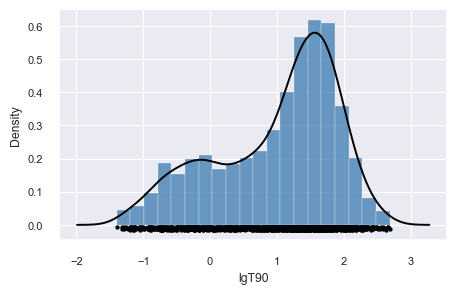

In [79]:
df_batse_t90 = dt.load_dataset("batse", ["lgT90"], plot_data=True)

Create models.

In [80]:
models_batse_t90 = create_models(df_batse_t90)

[I]: >>> Creating 1G model...
[W]: Model 'batse_lgT90_1G' already created! Skipping...
[I]: >>> Creating 2G model...
[W]: Model 'batse_lgT90_2G' already created! Skipping...
[I]: >>> Creating 3G model...
[W]: Model 'batse_lgT90_3G' already created! Skipping...
[I]: >>> Creating 4G model...
[W]: Model 'batse_lgT90_4G' already created! Skipping...
[I]: >>> Creating 5G model...
[W]: Model 'batse_lgT90_5G' already created! Skipping...
[I]: >>> Creating 6G model...
[W]: Model 'batse_lgT90_6G' already created! Skipping...
[I]: >>> Creating 7G model...
[W]: Model 'batse_lgT90_7G' already created! Skipping...
[I]: >>> Creating 8G model...
[W]: Model 'batse_lgT90_8G' already created! Skipping...
[I]: >>> Creating 9G model...
[W]: Model 'batse_lgT90_9G' already created! Skipping...
[I]: >>> Creating 10G model...
[W]: Model 'batse_lgT90_10G' already created! Skipping...


Display all models.

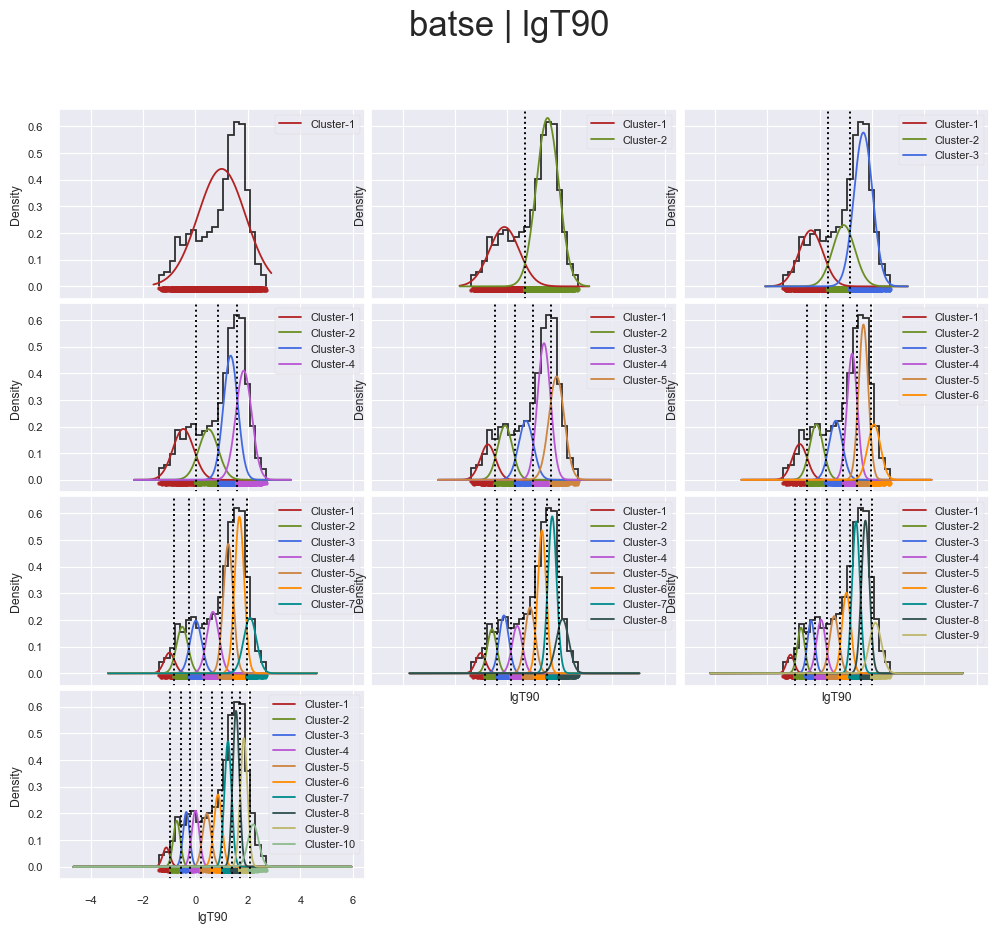

In [81]:
plot_models(models_batse_t90, df_batse_t90)

Evaluate all models.

In [84]:
evaluate_models(models_batse_t90, df_batse_t90, save=True)

[I]: [1/10] Evaluating model: batse_lgT90_1G
[I]: [2/10] Evaluating model: batse_lgT90_2G


[I]: [3/10] Evaluating model: batse_lgT90_3G
[I]: [4/10] Evaluating model: batse_lgT90_4G
[I]: [5/10] Evaluating model: batse_lgT90_5G
[I]: [6/10] Evaluating model: batse_lgT90_6G
[I]: [7/10] Evaluating model: batse_lgT90_7G
[I]: [8/10] Evaluating model: batse_lgT90_8G
[I]: [9/10] Evaluating model: batse_lgT90_9G
[I]: [10/10] Evaluating model: batse_lgT90_10G


Display model scores.

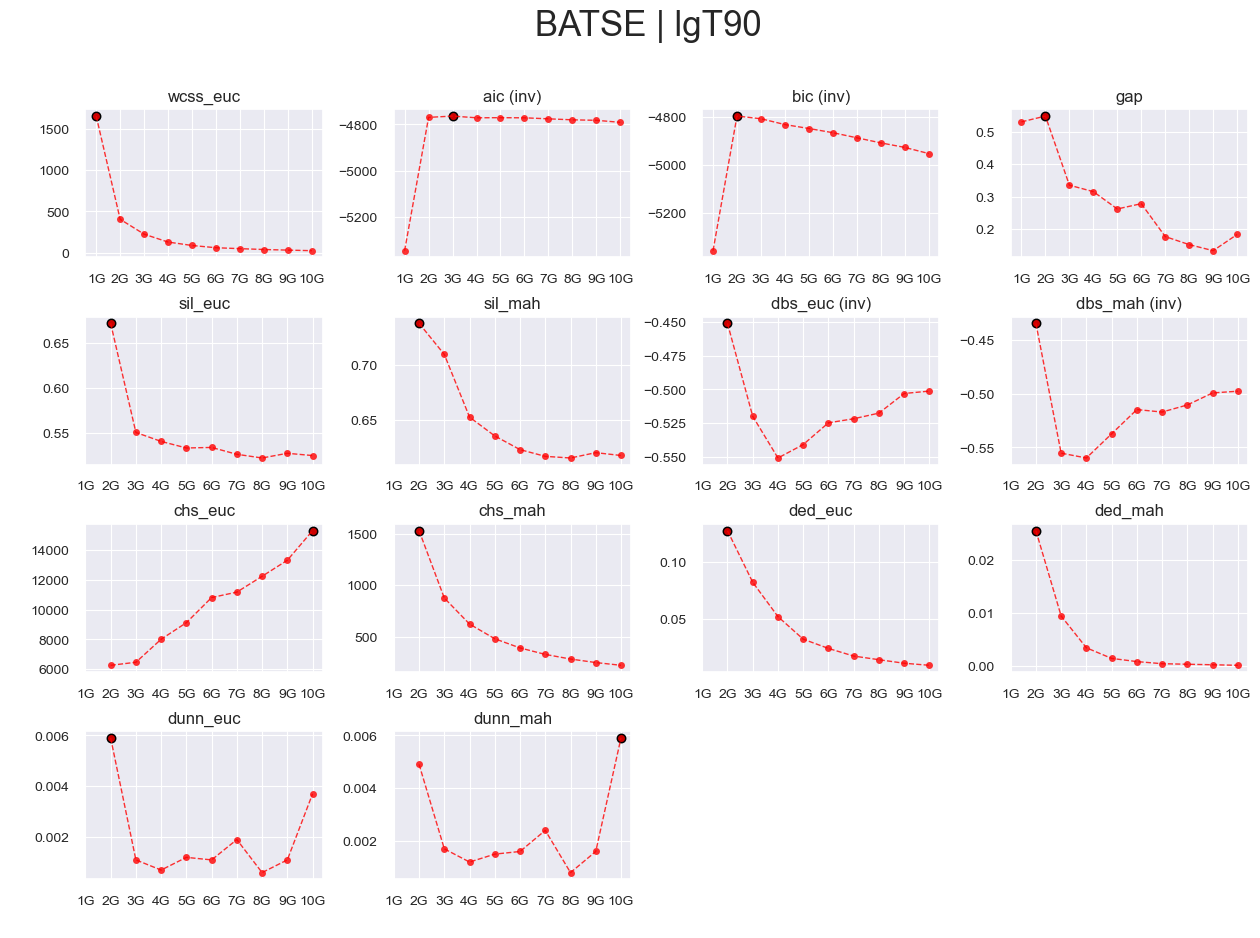

In [85]:
plot_scores("batse", ["lgT90"])

### b. Spectral Hardness (lgHrd)

Load dataset.

[I]: >>> Dataset BATSE loaded with features: ['lgHrd']
[I]:   > Number of GRBs: 2081


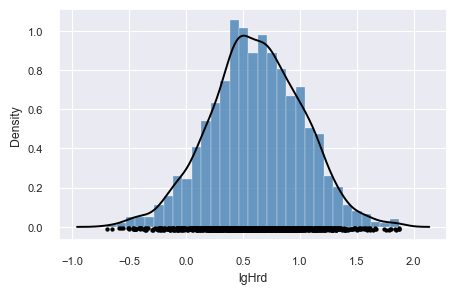

In [86]:
df_batse_hrd = dt.load_dataset("batse", ["lgHrd"], plot_data=True)

Create models.

In [87]:
models_batse_hrd = create_models(df_batse_hrd)

[I]: >>> Creating 1G model...
[W]: Model 'batse_lgHrd_1G' already created! Skipping...
[I]: >>> Creating 2G model...
[W]: Model 'batse_lgHrd_2G' already created! Skipping...
[I]: >>> Creating 3G model...


[W]: Model 'batse_lgHrd_3G' already created! Skipping...
[I]: >>> Creating 4G model...
[W]: Model 'batse_lgHrd_4G' already created! Skipping...
[I]: >>> Creating 5G model...
[W]: Model 'batse_lgHrd_5G' already created! Skipping...
[I]: >>> Creating 6G model...
[W]: Model 'batse_lgHrd_6G' already created! Skipping...
[I]: >>> Creating 7G model...
[W]: Model 'batse_lgHrd_7G' already created! Skipping...
[I]: >>> Creating 8G model...
[W]: Model 'batse_lgHrd_8G' already created! Skipping...
[I]: >>> Creating 9G model...
[W]: Model 'batse_lgHrd_9G' already created! Skipping...
[I]: >>> Creating 10G model...
[W]: Model 'batse_lgHrd_10G' already created! Skipping...


Display all models.

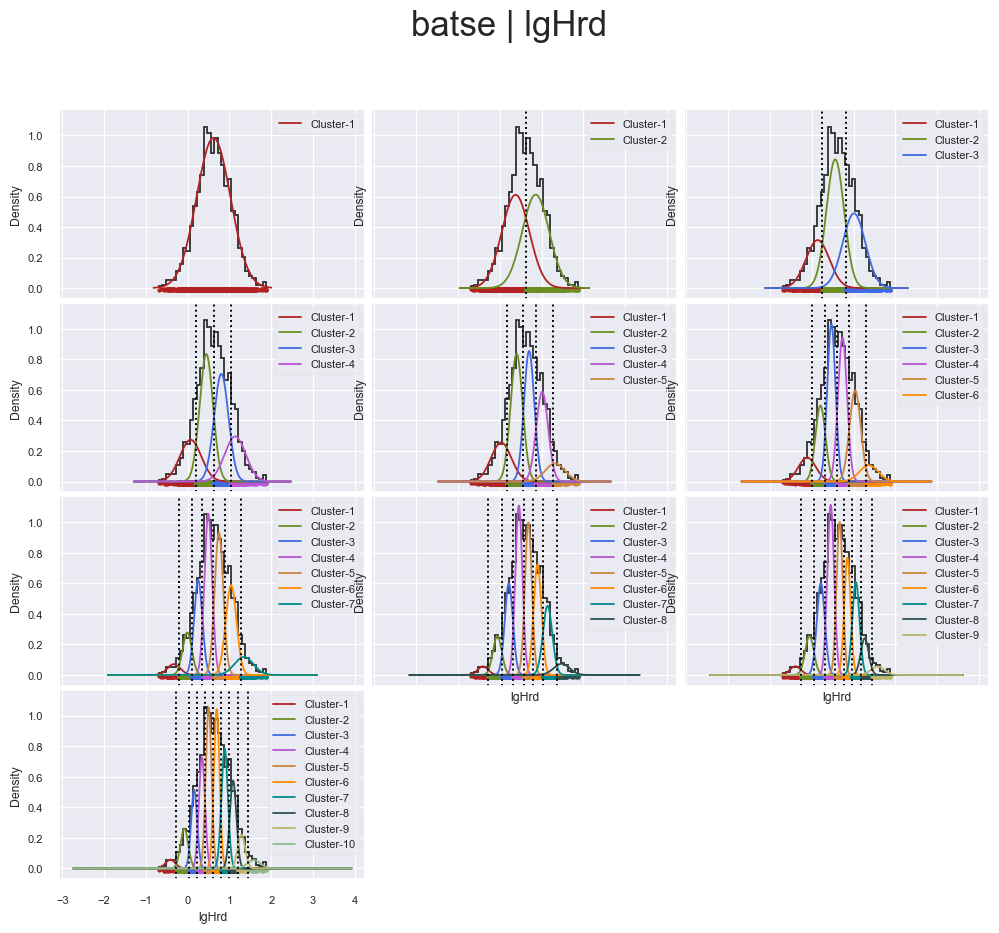

In [88]:
plot_models(models_batse_hrd, df_batse_hrd)

Evaluate all models.

In [89]:
evaluate_models(models_batse_hrd, df_batse_hrd, save=True)

[I]: [1/10] Evaluating model: batse_lgHrd_1G


[I]: [2/10] Evaluating model: batse_lgHrd_2G
[I]: [3/10] Evaluating model: batse_lgHrd_3G
[I]: [4/10] Evaluating model: batse_lgHrd_4G
[I]: [5/10] Evaluating model: batse_lgHrd_5G
[I]: [6/10] Evaluating model: batse_lgHrd_6G
[I]: [7/10] Evaluating model: batse_lgHrd_7G
[I]: [8/10] Evaluating model: batse_lgHrd_8G
[I]: [9/10] Evaluating model: batse_lgHrd_9G
[I]: [10/10] Evaluating model: batse_lgHrd_10G


Display model scores.

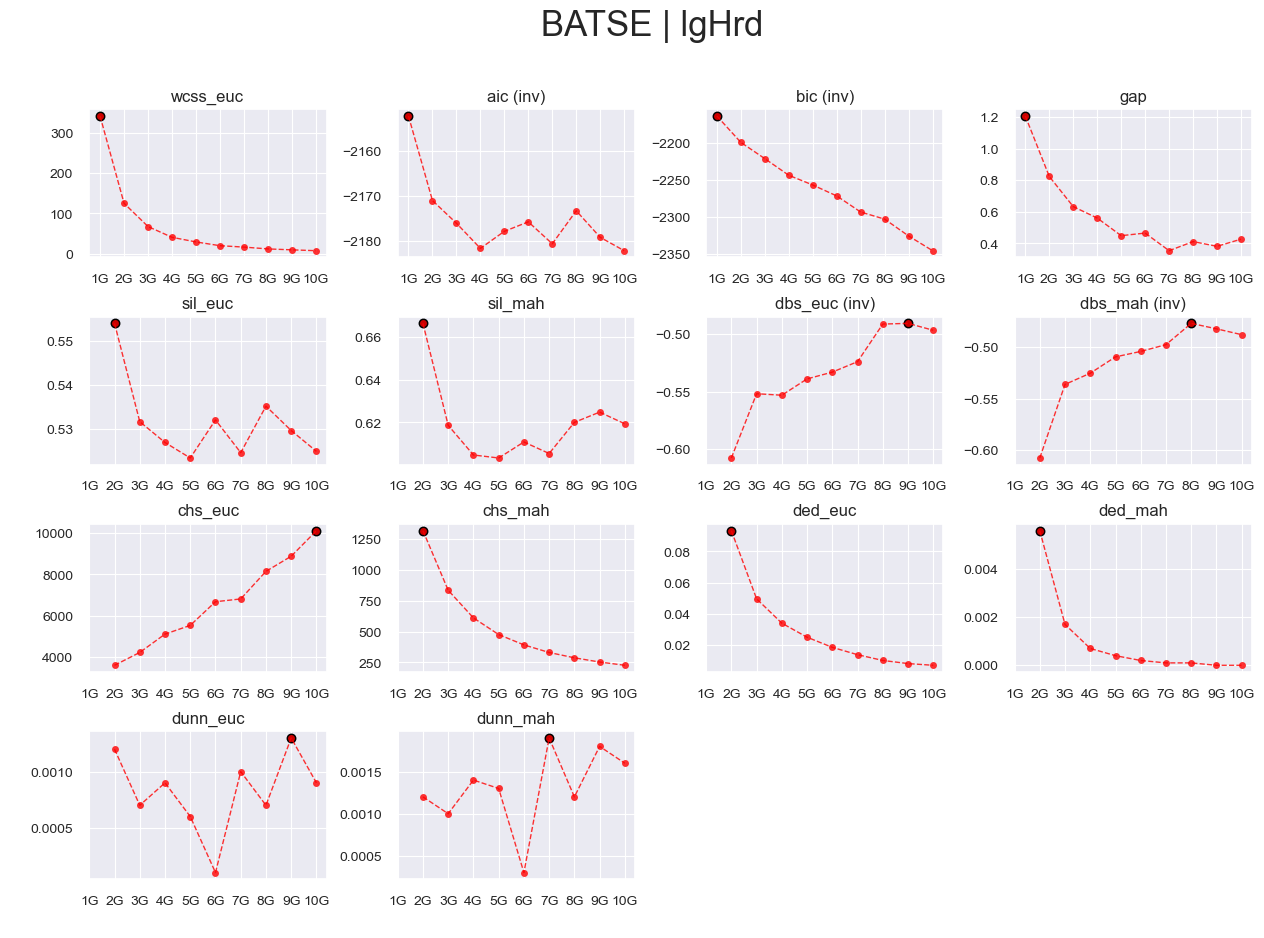

In [90]:
plot_scores("batse", ["lgHrd"])

### c. Duration-Spectral Hardness (lgT90-lgHrd)

Load dataset.

[I]: >>> Dataset BATSE loaded with features: ['lgT90', 'lgHrd']
[I]:   > Number of GRBs: 1924


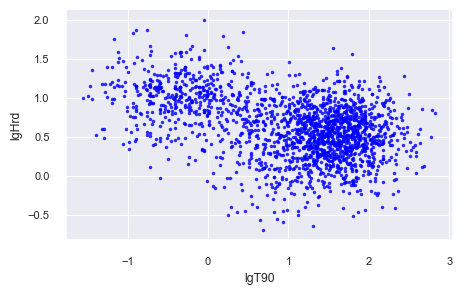

In [91]:
df_batse_t90_hrd = dt.load_dataset("batse", ["lgT90", "lgHrd"], plot_data=True)

Create models.

In [92]:
models_batse_t90_hrd = create_models(df_batse_t90_hrd)

[I]: >>> Creating 1G model...
[W]: Model 'batse_lgT90-lgHrd_1G' already created! Skipping...
[I]: >>> Creating 2G model...
[W]: Model 'batse_lgT90-lgHrd_2G' already created! Skipping...
[I]: >>> Creating 3G model...
[W]: Model 'batse_lgT90-lgHrd_3G' already created! Skipping...
[I]: >>> Creating 4G model...
[W]: Model 'batse_lgT90-lgHrd_4G' already created! Skipping...
[I]: >>> Creating 5G model...
[W]: Model 'batse_lgT90-lgHrd_5G' already created! Skipping...
[I]: >>> Creating 6G model...
[W]: Model 'batse_lgT90-lgHrd_6G' already created! Skipping...
[I]: >>> Creating 7G model...
[W]: Model 'batse_lgT90-lgHrd_7G' already created! Skipping...
[I]: >>> Creating 8G model...
[W]: Model 'batse_lgT90-lgHrd_8G' already created! Skipping...
[I]: >>> Creating 9G model...
[W]: Model 'batse_lgT90-lgHrd_9G' already created! Skipping...
[I]: >>> Creating 10G model...
[W]: Model 'batse_lgT90-lgHrd_10G' already created! Skipping...


Display all models.

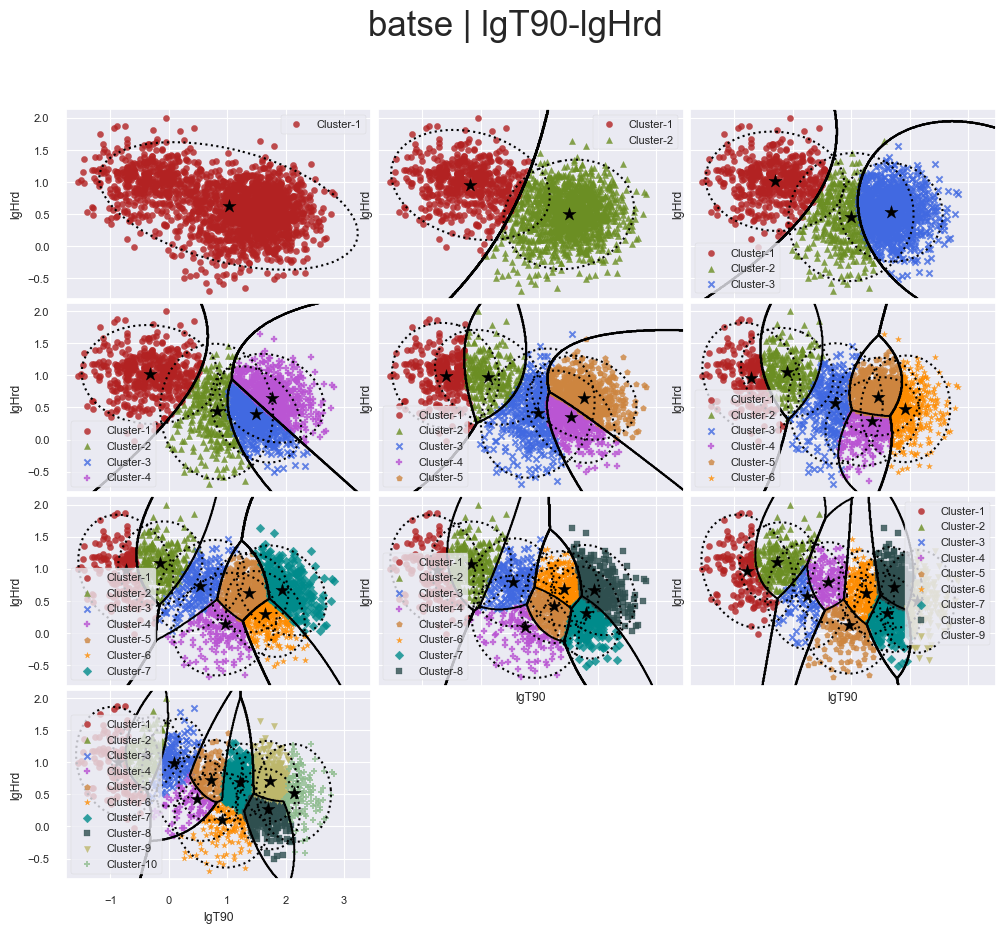

In [93]:
plot_models(models_batse_t90_hrd, df_batse_t90_hrd)

Evaluate all models.

In [95]:
evaluate_models(models_batse_t90_hrd, df_batse_t90_hrd, save=True)

[I]: [1/10] Evaluating model: batse_lgT90-lgHrd_1G
[I]: [2/10] Evaluating model: batse_lgT90-lgHrd_2G


[I]: [3/10] Evaluating model: batse_lgT90-lgHrd_3G
[I]: [4/10] Evaluating model: batse_lgT90-lgHrd_4G
[I]: [5/10] Evaluating model: batse_lgT90-lgHrd_5G
[I]: [6/10] Evaluating model: batse_lgT90-lgHrd_6G
[I]: [7/10] Evaluating model: batse_lgT90-lgHrd_7G
[I]: [8/10] Evaluating model: batse_lgT90-lgHrd_8G
[I]: [9/10] Evaluating model: batse_lgT90-lgHrd_9G
[I]: [10/10] Evaluating model: batse_lgT90-lgHrd_10G


Display model scores.

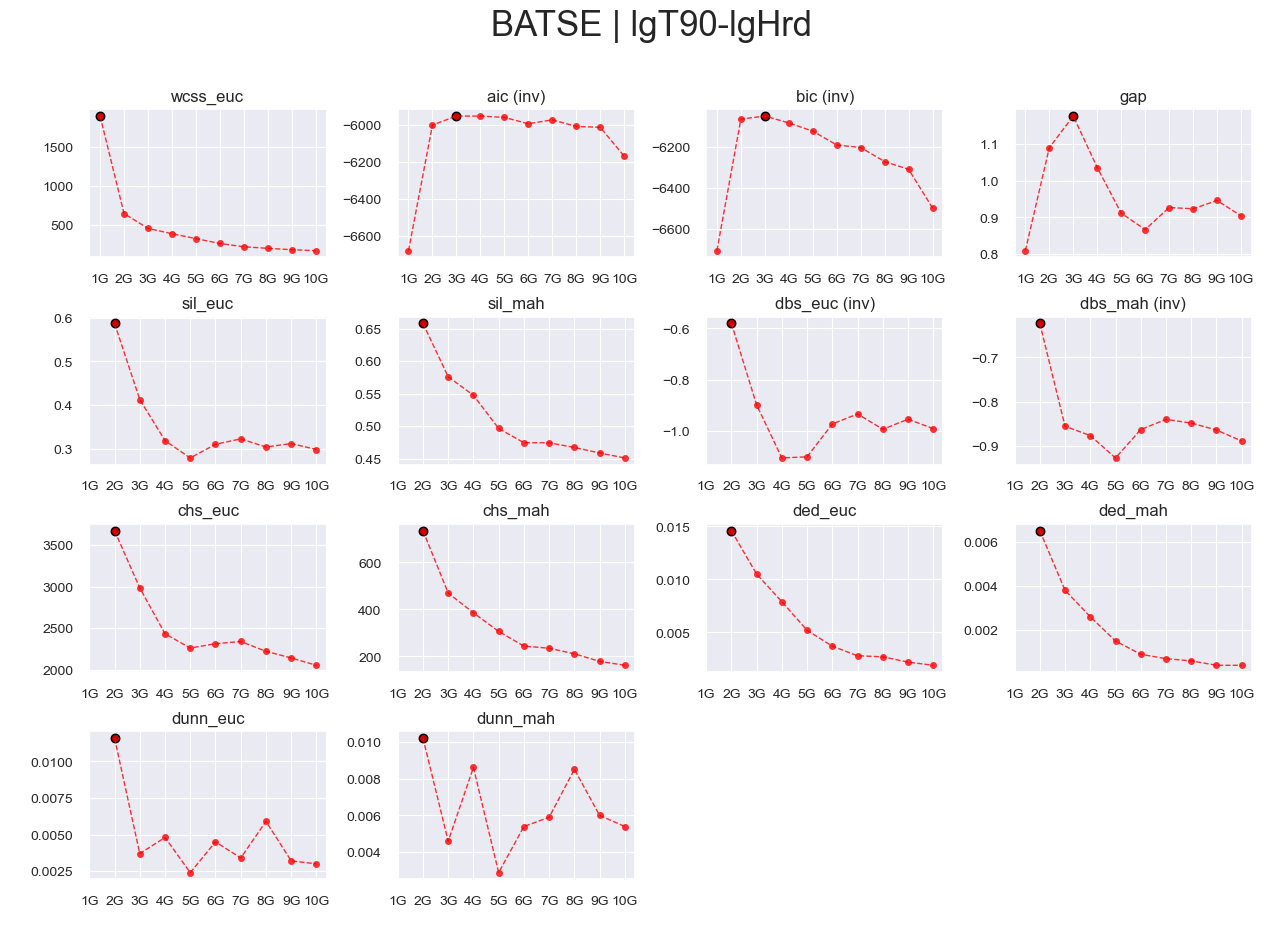

In [96]:
plot_scores("batse", ["lgT90", "lgHrd"])

-----

## 2. FERMI

### a. Duration (lgT90)

Load dataset.

[I]: >>> Dataset FERMI loaded with features: ['lgT90']
[I]:   > Number of GRBs: 3555


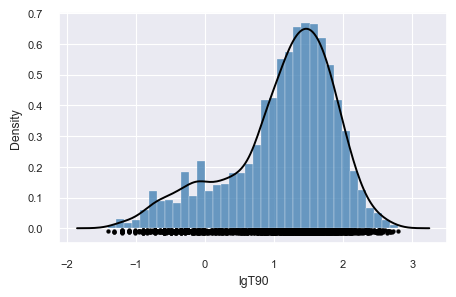

In [97]:
df_fermi_t90 = dt.load_dataset("fermi", ["lgT90"], plot_data=True)

Create models.

In [98]:
models_fermi_t90 = create_models(df_fermi_t90)

[I]: >>> Creating 1G model...
[W]: Model 'fermi_lgT90_1G' already created! Skipping...
[I]: >>> Creating 2G model...
[W]: Model 'fermi_lgT90_2G' already created! Skipping...
[I]: >>> Creating 3G model...
[W]: Model 'fermi_lgT90_3G' already created! Skipping...
[I]: >>> Creating 4G model...
[W]: Model 'fermi_lgT90_4G' already created! Skipping...
[I]: >>> Creating 5G model...
[W]: Model 'fermi_lgT90_5G' already created! Skipping...
[I]: >>> Creating 6G model...
[W]: Model 'fermi_lgT90_6G' already created! Skipping...
[I]: >>> Creating 7G model...
[W]: Model 'fermi_lgT90_7G' already created! Skipping...
[I]: >>> Creating 8G model...
[W]: Model 'fermi_lgT90_8G' already created! Skipping...
[I]: >>> Creating 9G model...


[W]: Model 'fermi_lgT90_9G' already created! Skipping...
[I]: >>> Creating 10G model...
[W]: Model 'fermi_lgT90_10G' already created! Skipping...


Display all models.

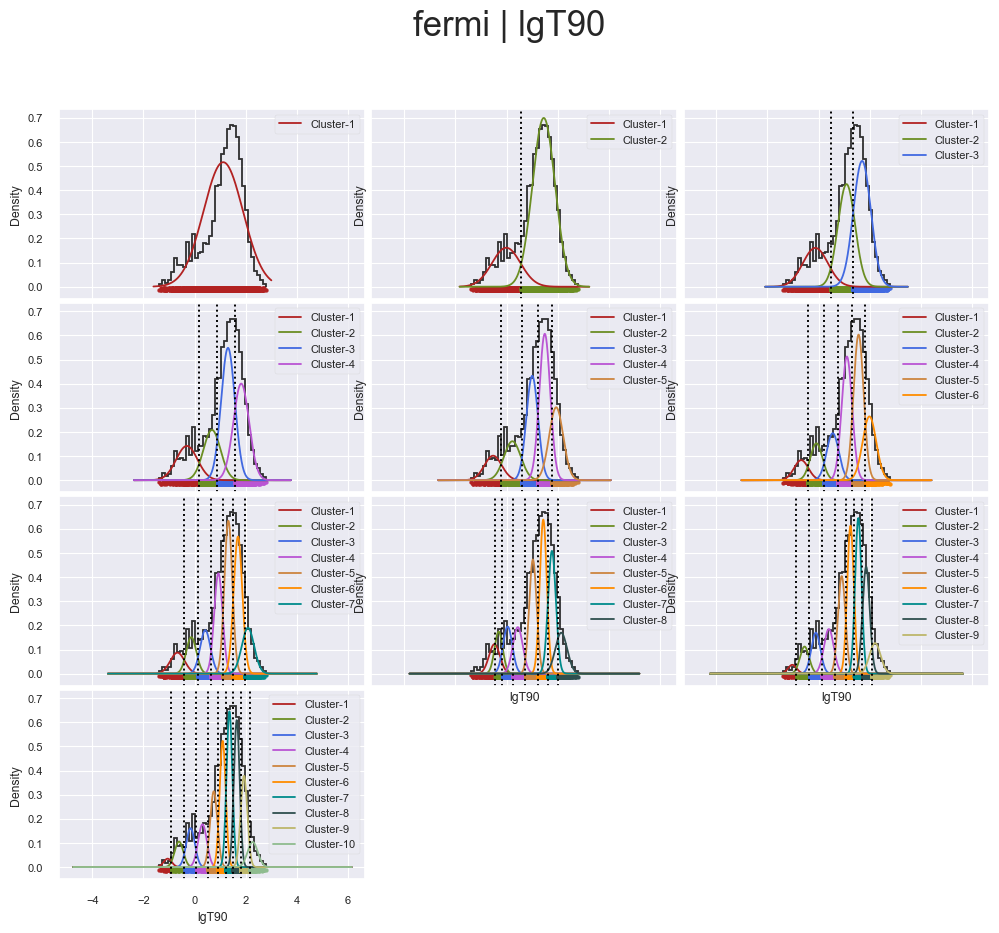

In [99]:
plot_models(models_fermi_t90, df_fermi_t90)

Evaluate all models.

In [100]:
evaluate_models(models_fermi_t90, df_fermi_t90, save=True)

[I]: [1/10] Evaluating model: fermi_lgT90_1G


[I]: [2/10] Evaluating model: fermi_lgT90_2G
[I]: [3/10] Evaluating model: fermi_lgT90_3G
[I]: [4/10] Evaluating model: fermi_lgT90_4G
[I]: [5/10] Evaluating model: fermi_lgT90_5G
[I]: [6/10] Evaluating model: fermi_lgT90_6G
[I]: [7/10] Evaluating model: fermi_lgT90_7G
[I]: [8/10] Evaluating model: fermi_lgT90_8G
[I]: [9/10] Evaluating model: fermi_lgT90_9G
[I]: [10/10] Evaluating model: fermi_lgT90_10G


Display model scores.

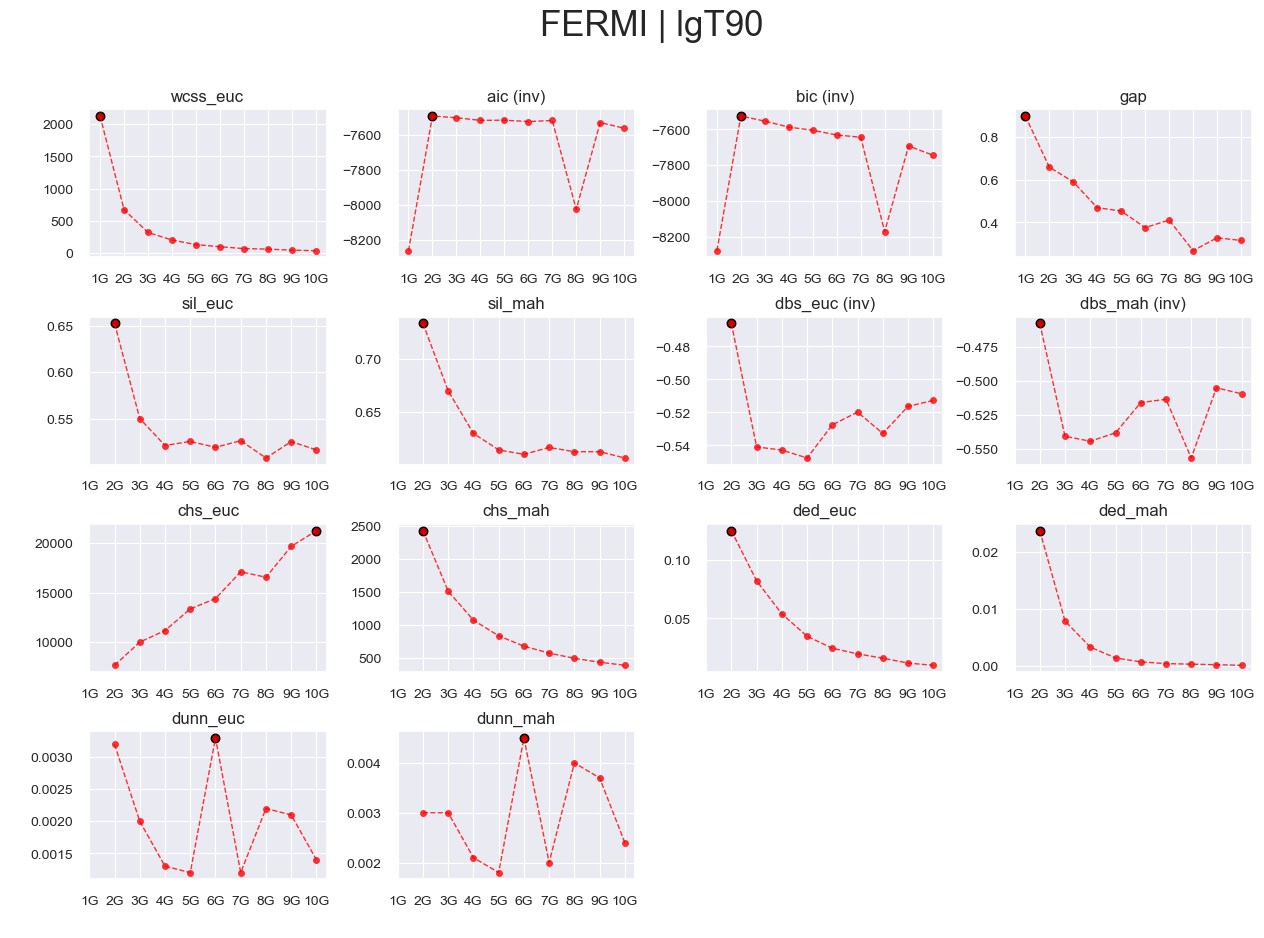

In [101]:
plot_scores("fermi", ["lgT90"])

### b. Spectral Hardness (lgHrd)

Load dataset.

[I]: >>> Dataset FERMI loaded with features: ['lgHrd']
[I]:   > Number of GRBs: 2291


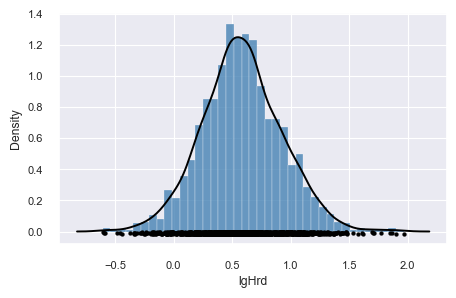

In [102]:
df_fermi_hrd = dt.load_dataset("fermi", ["lgHrd"], plot_data=True)

Create models.

In [103]:
models_fermi_hrd = create_models(df_fermi_hrd)

[I]: >>> Creating 1G model...
[W]: Model 'fermi_lgHrd_1G' already created! Skipping...
[I]: >>> Creating 2G model...
[W]: Model 'fermi_lgHrd_2G' already created! Skipping...
[I]: >>> Creating 3G model...
[W]: Model 'fermi_lgHrd_3G' already created! Skipping...
[I]: >>> Creating 4G model...
[W]: Model 'fermi_lgHrd_4G' already created! Skipping...
[I]: >>> Creating 5G model...
[W]: Model 'fermi_lgHrd_5G' already created! Skipping...
[I]: >>> Creating 6G model...
[W]: Model 'fermi_lgHrd_6G' already created! Skipping...
[I]: >>> Creating 7G model...
[W]: Model 'fermi_lgHrd_7G' already created! Skipping...
[I]: >>> Creating 8G model...
[W]: Model 'fermi_lgHrd_8G' already created! Skipping...
[I]: >>> Creating 9G model...
[W]: Model 'fermi_lgHrd_9G' already created! Skipping...
[I]: >>> Creating 10G model...
[W]: Model 'fermi_lgHrd_10G' already created! Skipping...


Display all models.

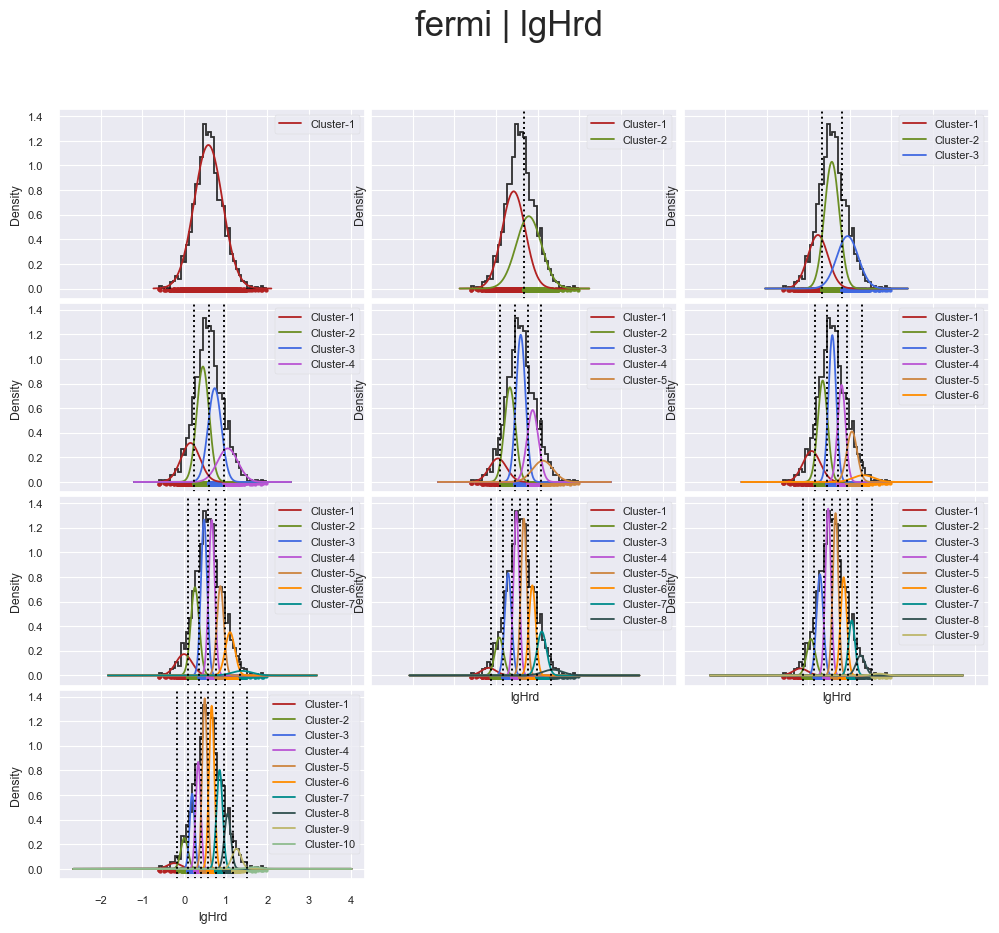

In [104]:
plot_models(models_fermi_hrd, df_fermi_hrd)

Evaluate all models.

In [105]:
evaluate_models(models_fermi_hrd, df_fermi_hrd, save=True)

[I]: [1/10] Evaluating model: fermi_lgHrd_1G


[I]: [2/10] Evaluating model: fermi_lgHrd_2G
[I]: [3/10] Evaluating model: fermi_lgHrd_3G
[I]: [4/10] Evaluating model: fermi_lgHrd_4G
[I]: [5/10] Evaluating model: fermi_lgHrd_5G
[I]: [6/10] Evaluating model: fermi_lgHrd_6G
[I]: [7/10] Evaluating model: fermi_lgHrd_7G
[I]: [8/10] Evaluating model: fermi_lgHrd_8G
[I]: [9/10] Evaluating model: fermi_lgHrd_9G
[I]: [10/10] Evaluating model: fermi_lgHrd_10G


Display model scores.

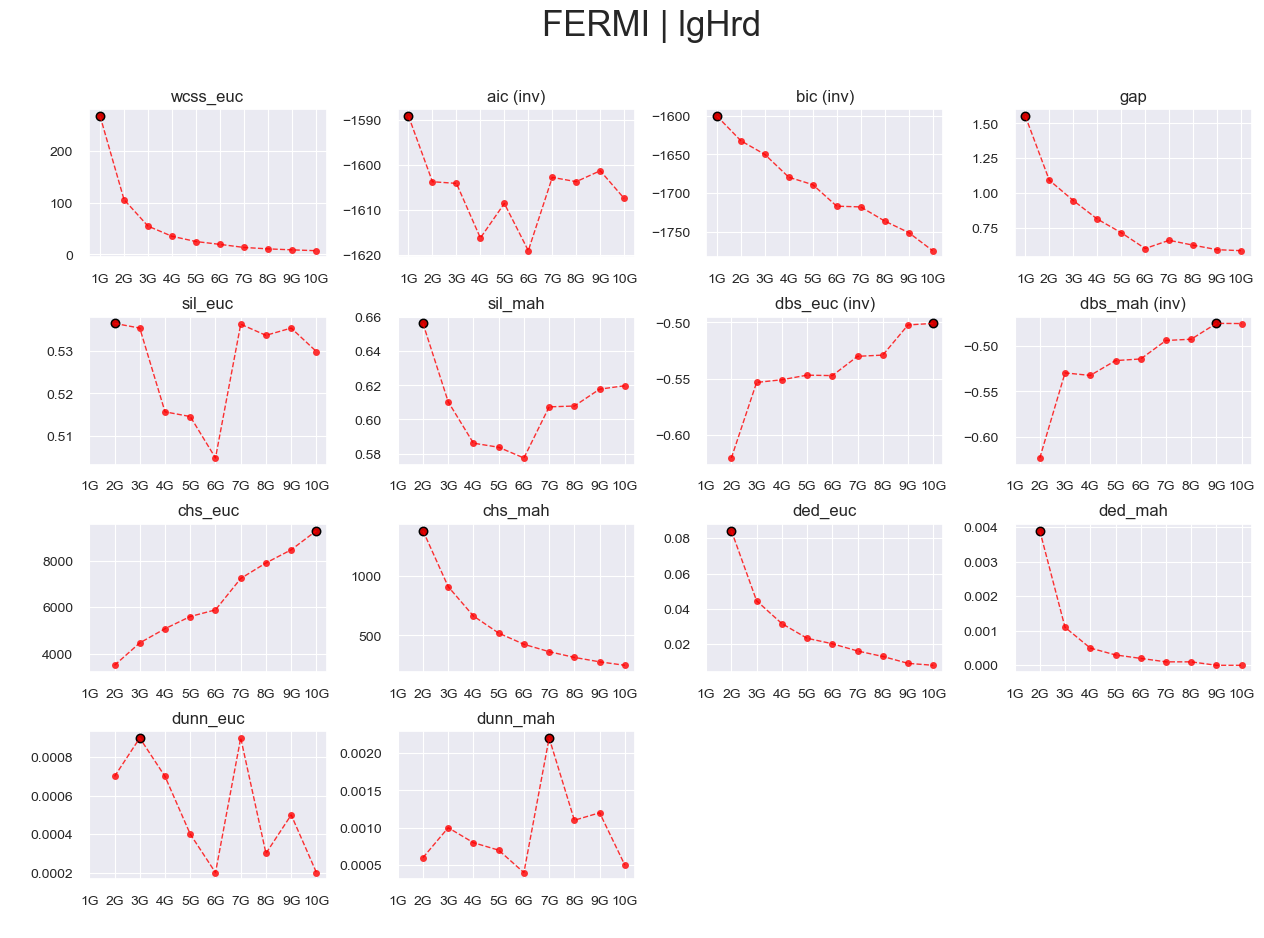

In [106]:
plot_scores("fermi", ["lgHrd"])

### c. Duration-Spectral Hardness (lgT90-lgHrd)

Load dataset.

[I]: >>> Dataset FERMI loaded with features: ['lgT90', 'lgHrd']
[I]:   > Number of GRBs: 2291


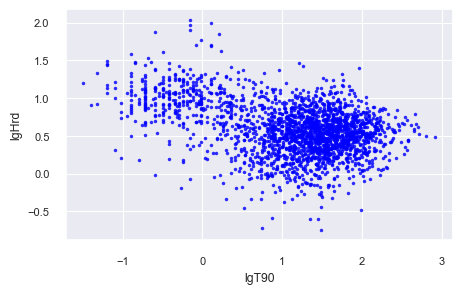

In [107]:
df_fermi_t90_hrd = dt.load_dataset("fermi", ["lgT90", "lgHrd"], plot_data=True)

Create models.

In [108]:
models_fermi_t90_hrd = create_models(df_fermi_t90_hrd)

[I]: >>> Creating 1G model...
[W]: Model 'fermi_lgT90-lgHrd_1G' already created! Skipping...
[I]: >>> Creating 2G model...
[W]: Model 'fermi_lgT90-lgHrd_2G' already created! Skipping...
[I]: >>> Creating 3G model...
[W]: Model 'fermi_lgT90-lgHrd_3G' already created! Skipping...
[I]: >>> Creating 4G model...
[W]: Model 'fermi_lgT90-lgHrd_4G' already created! Skipping...
[I]: >>> Creating 5G model...
[W]: Model 'fermi_lgT90-lgHrd_5G' already created! Skipping...
[I]: >>> Creating 6G model...
[W]: Model 'fermi_lgT90-lgHrd_6G' already created! Skipping...
[I]: >>> Creating 7G model...
[W]: Model 'fermi_lgT90-lgHrd_7G' already created! Skipping...
[I]: >>> Creating 8G model...
[W]: Model 'fermi_lgT90-lgHrd_8G' already created! Skipping...
[I]: >>> Creating 9G model...
[W]: Model 'fermi_lgT90-lgHrd_9G' already created! Skipping...
[I]: >>> Creating 10G model...
[W]: Model 'fermi_lgT90-lgHrd_10G' already created! Skipping...


Display all models.

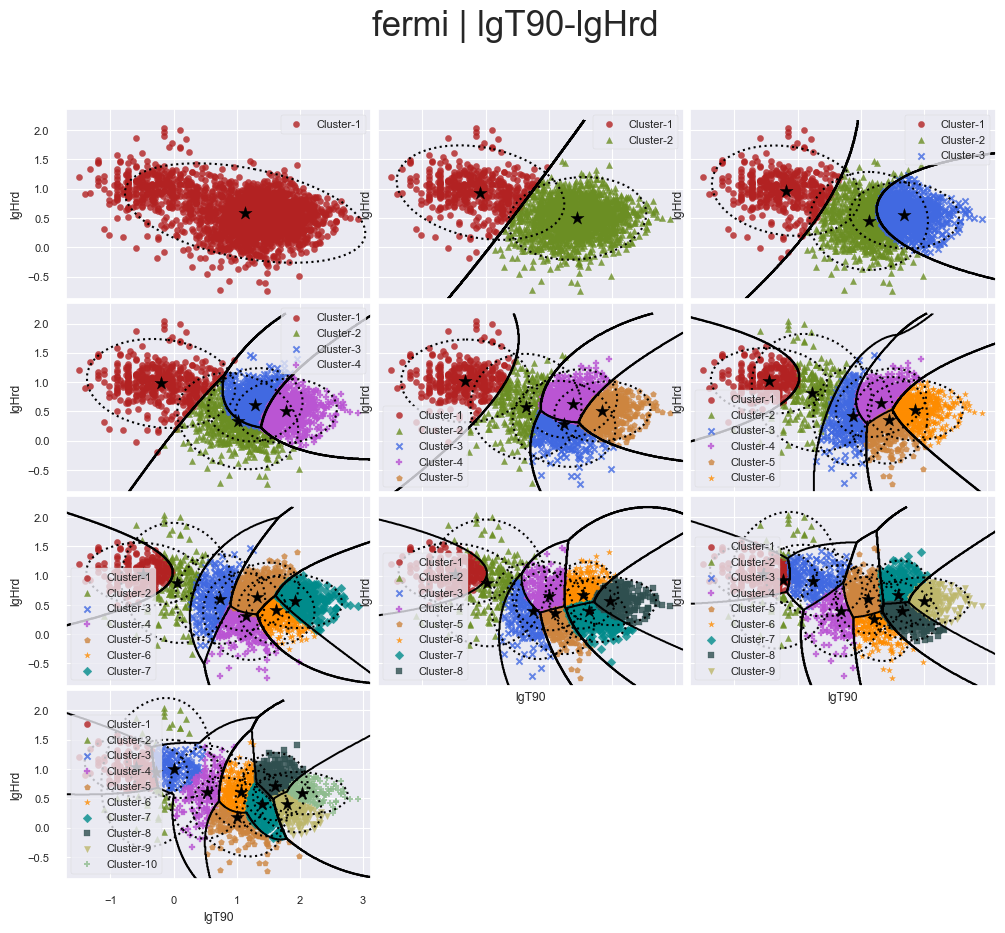

In [109]:
plot_models(models_fermi_t90_hrd, df_fermi_t90_hrd)

Evaluate all models.

In [110]:
evaluate_models(models_fermi_t90_hrd, df_fermi_t90_hrd, save=True)

[I]: [1/10] Evaluating model: fermi_lgT90-lgHrd_1G


[I]: [2/10] Evaluating model: fermi_lgT90-lgHrd_2G
[I]: [3/10] Evaluating model: fermi_lgT90-lgHrd_3G
[I]: [4/10] Evaluating model: fermi_lgT90-lgHrd_4G
[I]: [5/10] Evaluating model: fermi_lgT90-lgHrd_5G
[I]: [6/10] Evaluating model: fermi_lgT90-lgHrd_6G
[I]: [7/10] Evaluating model: fermi_lgT90-lgHrd_7G
[I]: [8/10] Evaluating model: fermi_lgT90-lgHrd_8G
[I]: [9/10] Evaluating model: fermi_lgT90-lgHrd_9G
[I]: [10/10] Evaluating model: fermi_lgT90-lgHrd_10G


Display model scores.

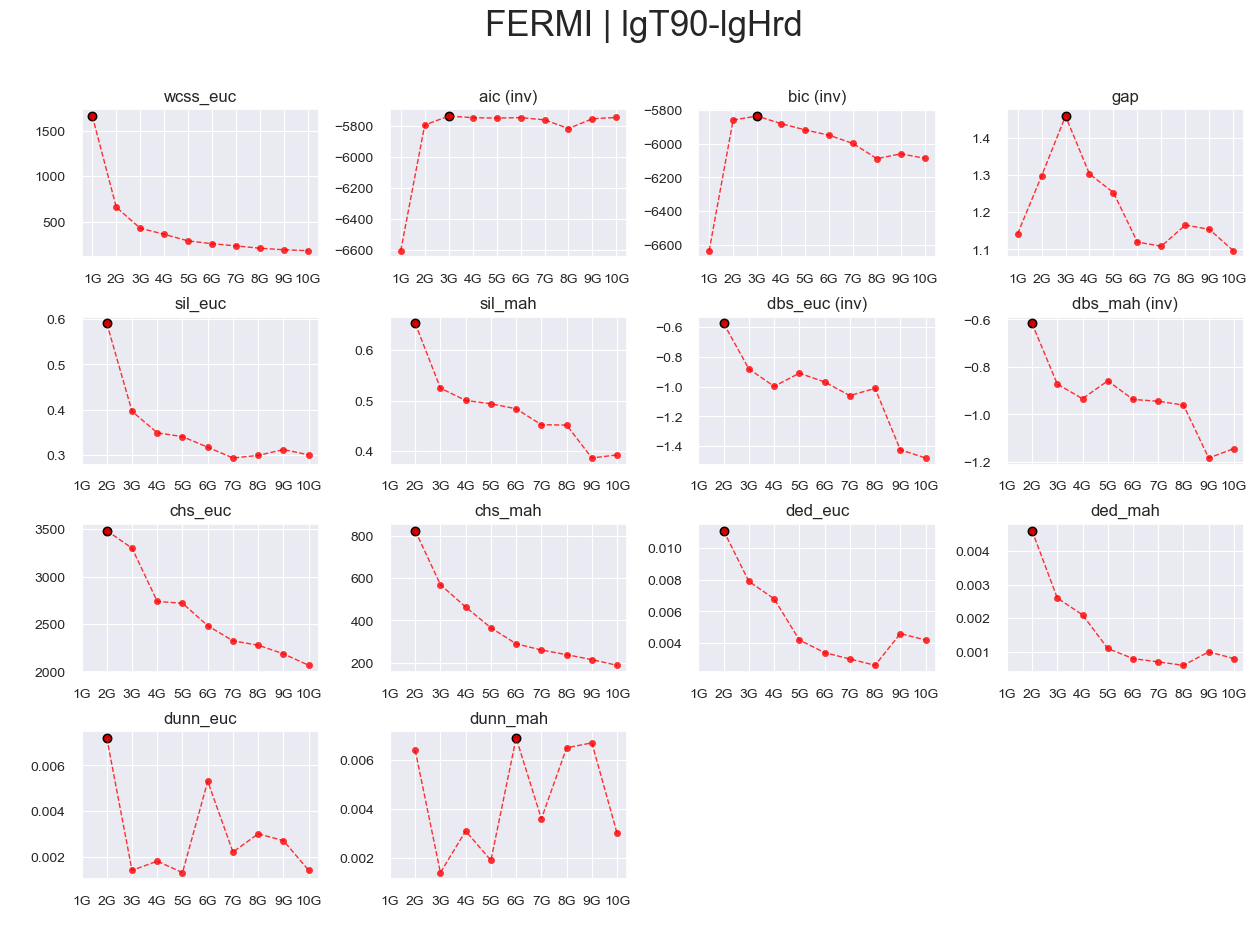

In [111]:
plot_scores("fermi", ["lgT90", "lgHrd"])

----

## 3. SWIFT

### a. Duration (lgT90)

Load dataset.

[I]: >>> Dataset SWIFT loaded with features: ['lgT90']
[I]:   > Number of GRBs: 1494


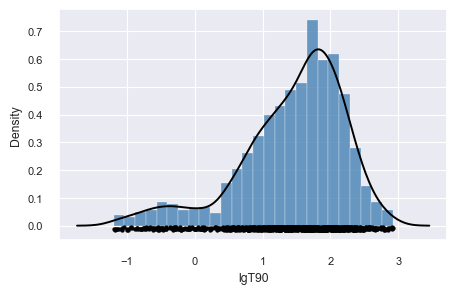

In [112]:
df_swift_t90 = dt.load_dataset("swift", ["lgT90"], plot_data=True)

Create models.

In [113]:
models_swift_t90 = create_models(df_swift_t90)

[I]: >>> Creating 1G model...
[W]: Model 'swift_lgT90_1G' already created! Skipping...
[I]: >>> Creating 2G model...
[W]: Model 'swift_lgT90_2G' already created! Skipping...
[I]: >>> Creating 3G model...
[W]: Model 'swift_lgT90_3G' already created! Skipping...
[I]: >>> Creating 4G model...
[W]: Model 'swift_lgT90_4G' already created! Skipping...


[I]: >>> Creating 5G model...
[W]: Model 'swift_lgT90_5G' already created! Skipping...
[I]: >>> Creating 6G model...
[W]: Model 'swift_lgT90_6G' already created! Skipping...
[I]: >>> Creating 7G model...
[W]: Model 'swift_lgT90_7G' already created! Skipping...
[I]: >>> Creating 8G model...
[W]: Model 'swift_lgT90_8G' already created! Skipping...
[I]: >>> Creating 9G model...
[W]: Model 'swift_lgT90_9G' already created! Skipping...
[I]: >>> Creating 10G model...
[W]: Model 'swift_lgT90_10G' already created! Skipping...


Display all models.

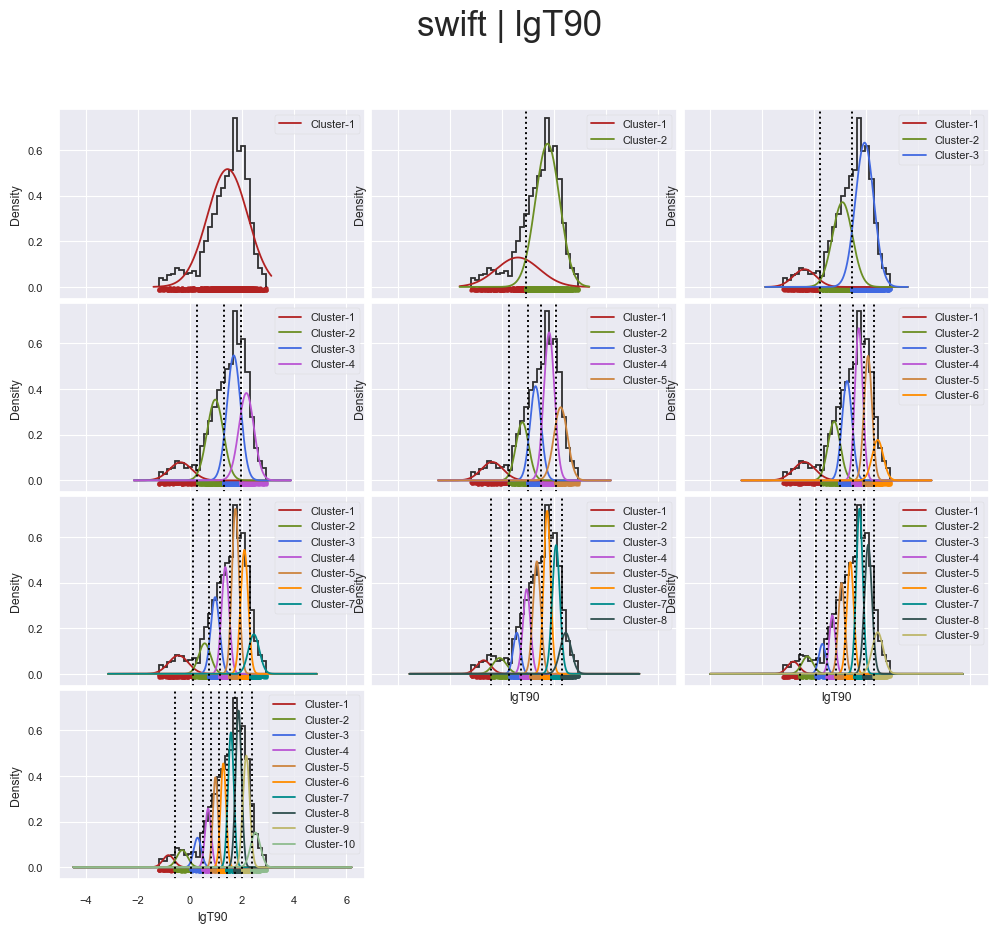

In [114]:
plot_models(models_swift_t90, df_swift_t90)

Evaluate all models.

In [115]:
evaluate_models(models_swift_t90, df_swift_t90, save=True)

[I]: [1/10] Evaluating model: swift_lgT90_1G


[I]: [2/10] Evaluating model: swift_lgT90_2G
[I]: [3/10] Evaluating model: swift_lgT90_3G
[I]: [4/10] Evaluating model: swift_lgT90_4G
[I]: [5/10] Evaluating model: swift_lgT90_5G
[I]: [6/10] Evaluating model: swift_lgT90_6G
[I]: [7/10] Evaluating model: swift_lgT90_7G
[I]: [8/10] Evaluating model: swift_lgT90_8G
[I]: [9/10] Evaluating model: swift_lgT90_9G
[I]: [10/10] Evaluating model: swift_lgT90_10G


Display model scores.

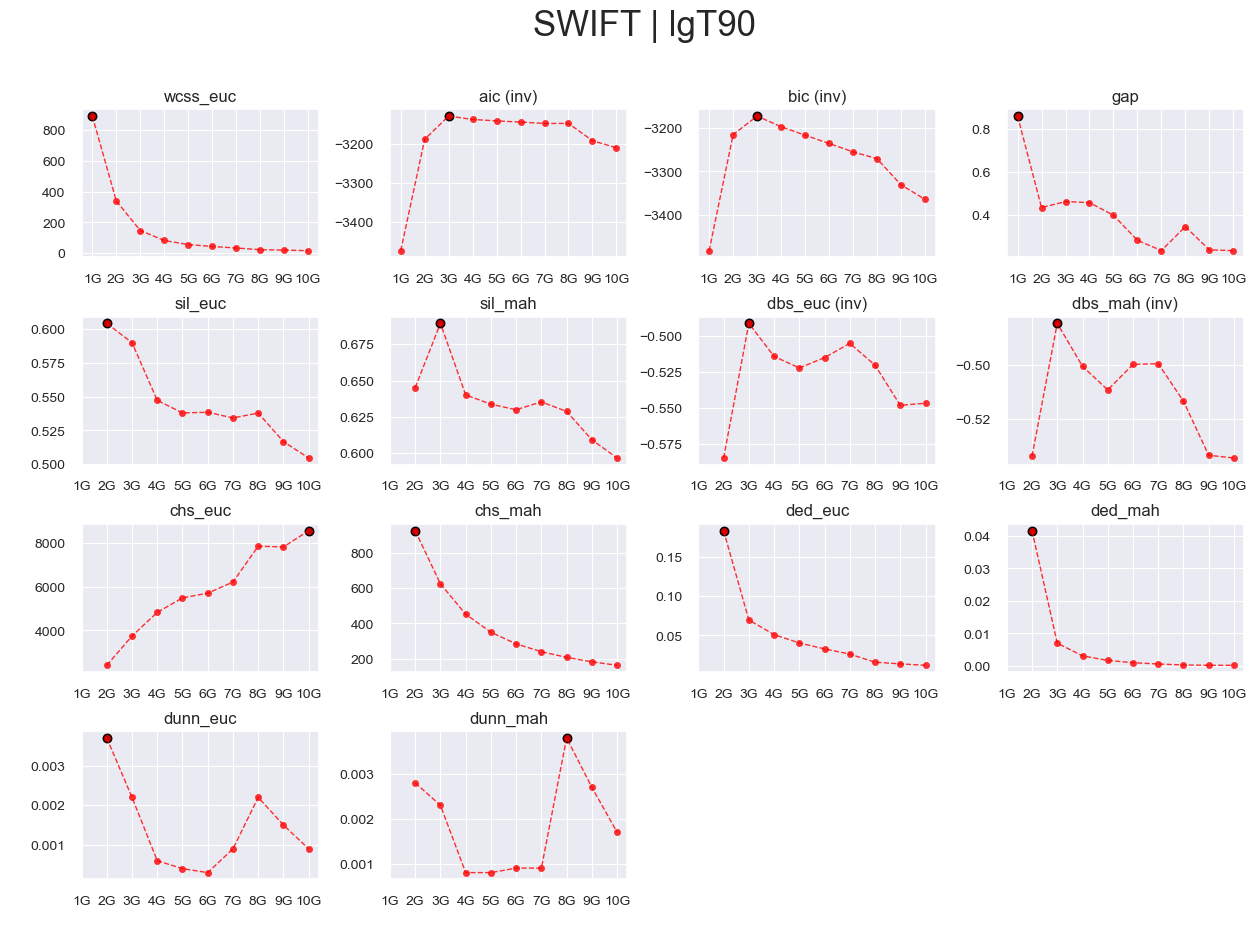

In [116]:
plot_scores("swift", ["lgT90"])

### b. Intrinsic Duration (lgT90i)

Load dataset.

[I]: >>> Dataset SWIFT loaded with features: ['lgT90i']
[I]:   > Number of GRBs: 480


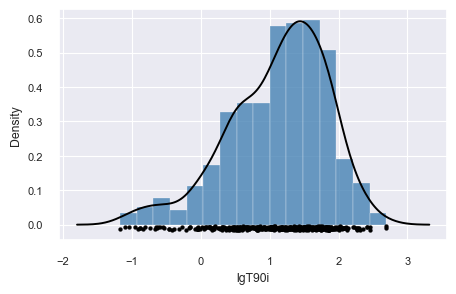

In [117]:
df_swift_t90i = dt.load_dataset("swift", ["lgT90i"], plot_data=True)

Create models.

In [118]:
models_swift_t90i = create_models(df_swift_t90i)

[I]: >>> Creating 1G model...
[W]: Model 'swift_lgT90i_1G' already created! Skipping...
[I]: >>> Creating 2G model...
[W]: Model 'swift_lgT90i_2G' already created! Skipping...
[I]: >>> Creating 3G model...
[W]: Model 'swift_lgT90i_3G' already created! Skipping...
[I]: >>> Creating 4G model...
[W]: Model 'swift_lgT90i_4G' already created! Skipping...
[I]: >>> Creating 5G model...
[W]: Model 'swift_lgT90i_5G' already created! Skipping...
[I]: >>> Creating 6G model...
[W]: Model 'swift_lgT90i_6G' already created! Skipping...
[I]: >>> Creating 7G model...
[W]: Model 'swift_lgT90i_7G' already created! Skipping...


[I]: >>> Creating 8G model...
[W]: Model 'swift_lgT90i_8G' already created! Skipping...
[I]: >>> Creating 9G model...
[W]: Model 'swift_lgT90i_9G' already created! Skipping...
[I]: >>> Creating 10G model...
[W]: Model 'swift_lgT90i_10G' already created! Skipping...


Display all models.

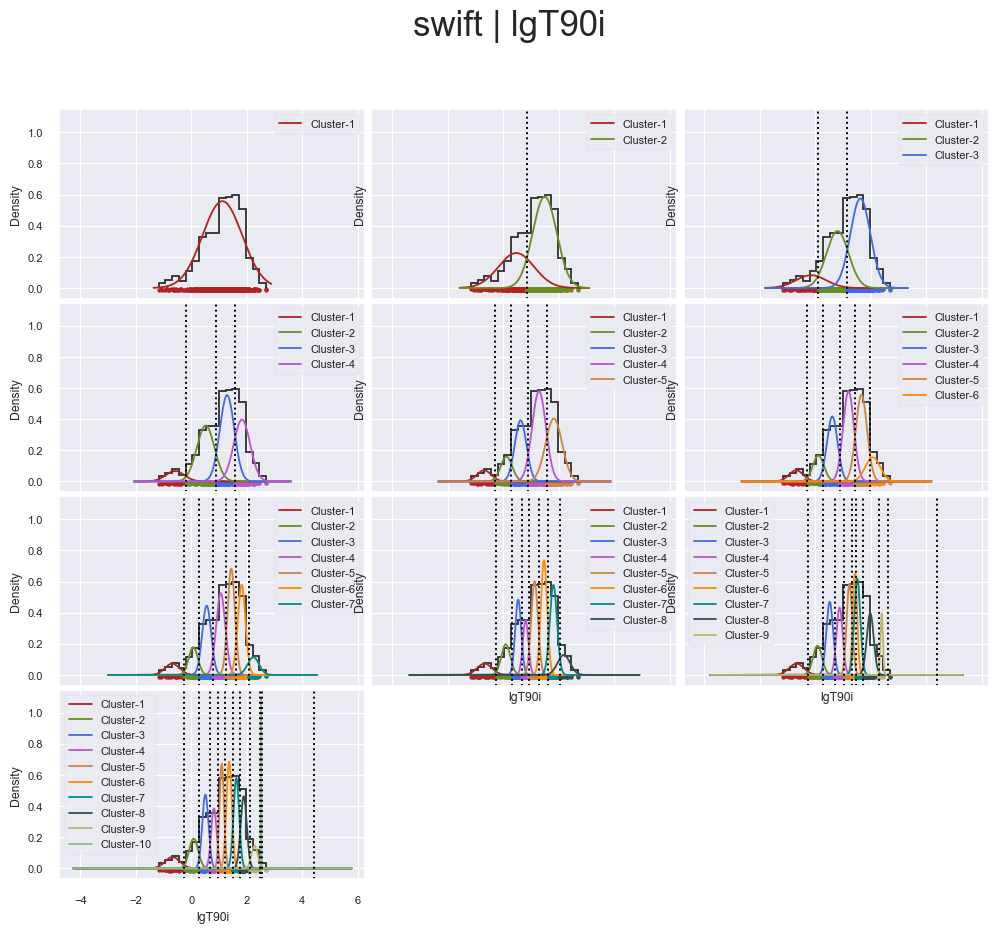

In [119]:
plot_models(models_swift_t90i, df_swift_t90i)

Evaluate all models.

In [120]:
evaluate_models(models_swift_t90i, df_swift_t90i, save=True)

[I]: [1/10] Evaluating model: swift_lgT90i_1G


[I]: [2/10] Evaluating model: swift_lgT90i_2G
[I]: [3/10] Evaluating model: swift_lgT90i_3G
[I]: [4/10] Evaluating model: swift_lgT90i_4G
[I]: [5/10] Evaluating model: swift_lgT90i_5G
[I]: [6/10] Evaluating model: swift_lgT90i_6G
[I]: [7/10] Evaluating model: swift_lgT90i_7G
[I]: [8/10] Evaluating model: swift_lgT90i_8G
[I]: [9/10] Evaluating model: swift_lgT90i_9G
[I]: [10/10] Evaluating model: swift_lgT90i_10G


Display model scores.

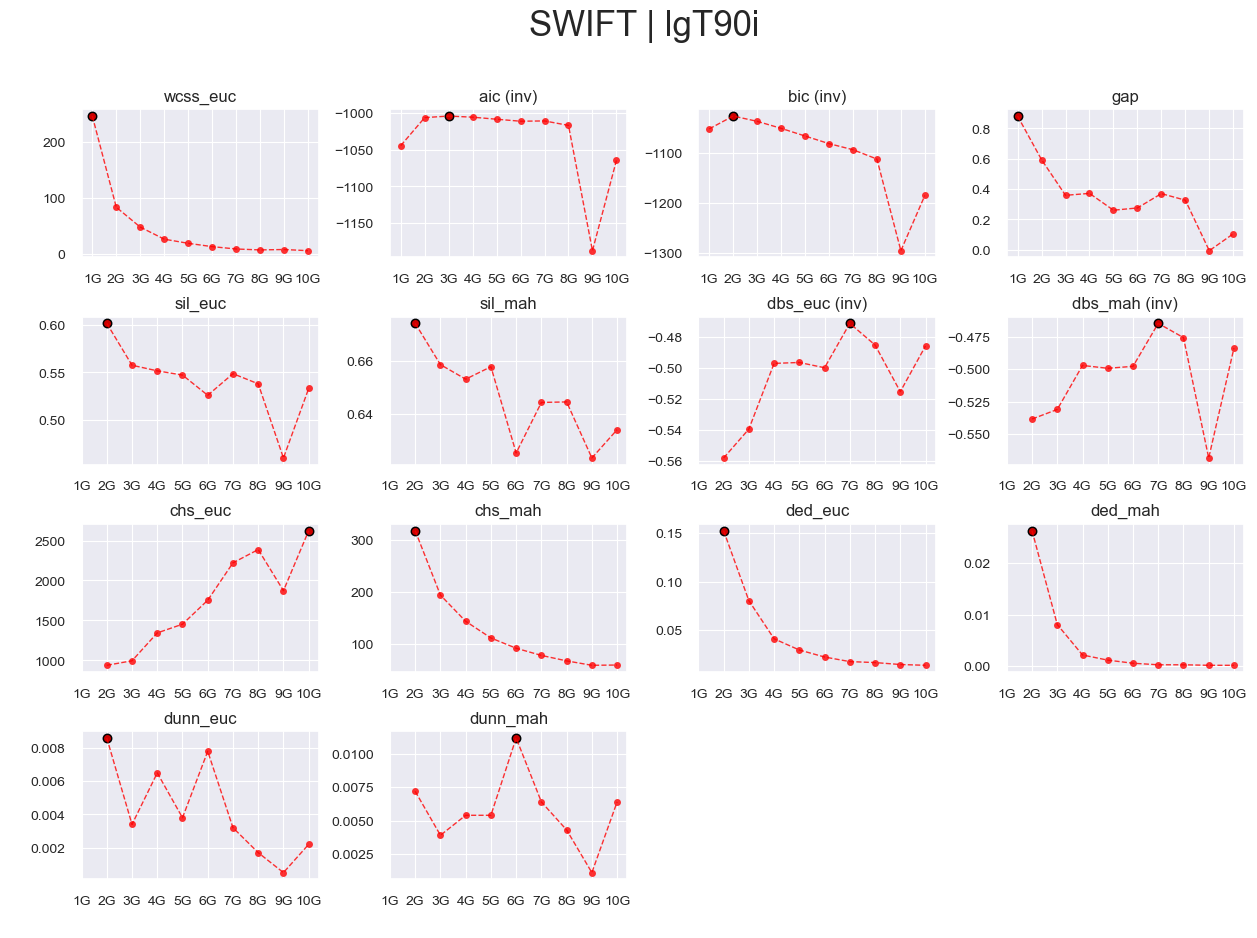

In [121]:
plot_scores("swift", ["lgT90i"])

### c. Spectral Hardness (lgHrd)

Load dataset.

[I]: >>> Dataset SWIFT loaded with features: ['lgHrd']
[I]:   > Number of GRBs: 1485


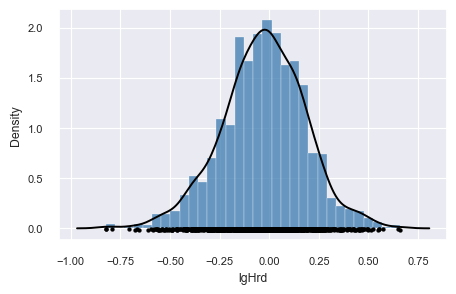

In [122]:
df_swift_hrd = dt.load_dataset("swift", ["lgHrd"], plot_data=True)

Create models.

In [123]:
models_swift_hrd = create_models(df_swift_hrd)

[I]: >>> Creating 1G model...
[W]: Model 'swift_lgHrd_1G' already created! Skipping...
[I]: >>> Creating 2G model...
[W]: Model 'swift_lgHrd_2G' already created! Skipping...
[I]: >>> Creating 3G model...
[W]: Model 'swift_lgHrd_3G' already created! Skipping...
[I]: >>> Creating 4G model...
[W]: Model 'swift_lgHrd_4G' already created! Skipping...
[I]: >>> Creating 5G model...
[W]: Model 'swift_lgHrd_5G' already created! Skipping...
[I]: >>> Creating 6G model...
[W]: Model 'swift_lgHrd_6G' already created! Skipping...
[I]: >>> Creating 7G model...
[W]: Model 'swift_lgHrd_7G' already created! Skipping...
[I]: >>> Creating 8G model...
[W]: Model 'swift_lgHrd_8G' already created! Skipping...
[I]: >>> Creating 9G model...
[W]: Model 'swift_lgHrd_9G' already created! Skipping...
[I]: >>> Creating 10G model...
[W]: Model 'swift_lgHrd_10G' already created! Skipping...


Display all models.

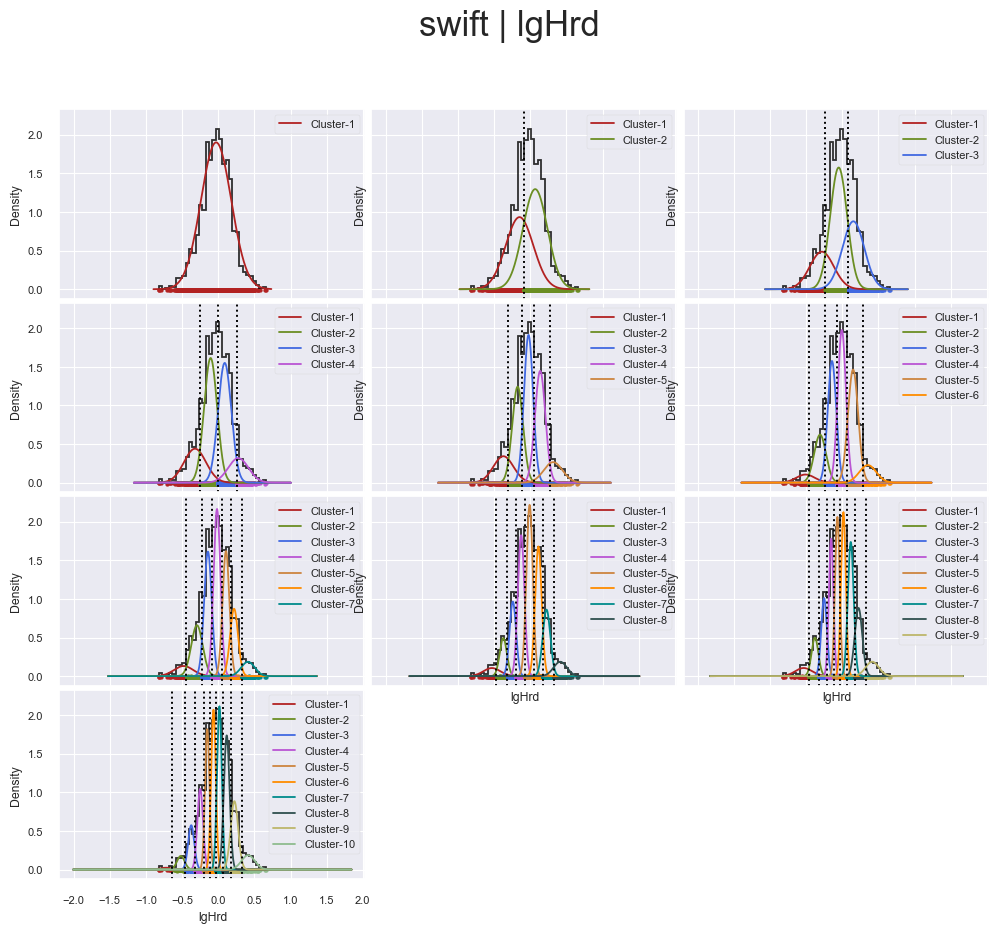

In [124]:
plot_models(models_swift_hrd, df_swift_hrd)

Evaluate all models.

In [125]:
evaluate_models(models_swift_hrd, df_swift_hrd, save=True)

[I]: [1/10] Evaluating model: swift_lgHrd_1G


[I]: [2/10] Evaluating model: swift_lgHrd_2G
[I]: [3/10] Evaluating model: swift_lgHrd_3G
[I]: [4/10] Evaluating model: swift_lgHrd_4G
[I]: [5/10] Evaluating model: swift_lgHrd_5G
[I]: [6/10] Evaluating model: swift_lgHrd_6G
[I]: [7/10] Evaluating model: swift_lgHrd_7G
[I]: [8/10] Evaluating model: swift_lgHrd_8G
[I]: [9/10] Evaluating model: swift_lgHrd_9G
[I]: [10/10] Evaluating model: swift_lgHrd_10G


Display model scores.

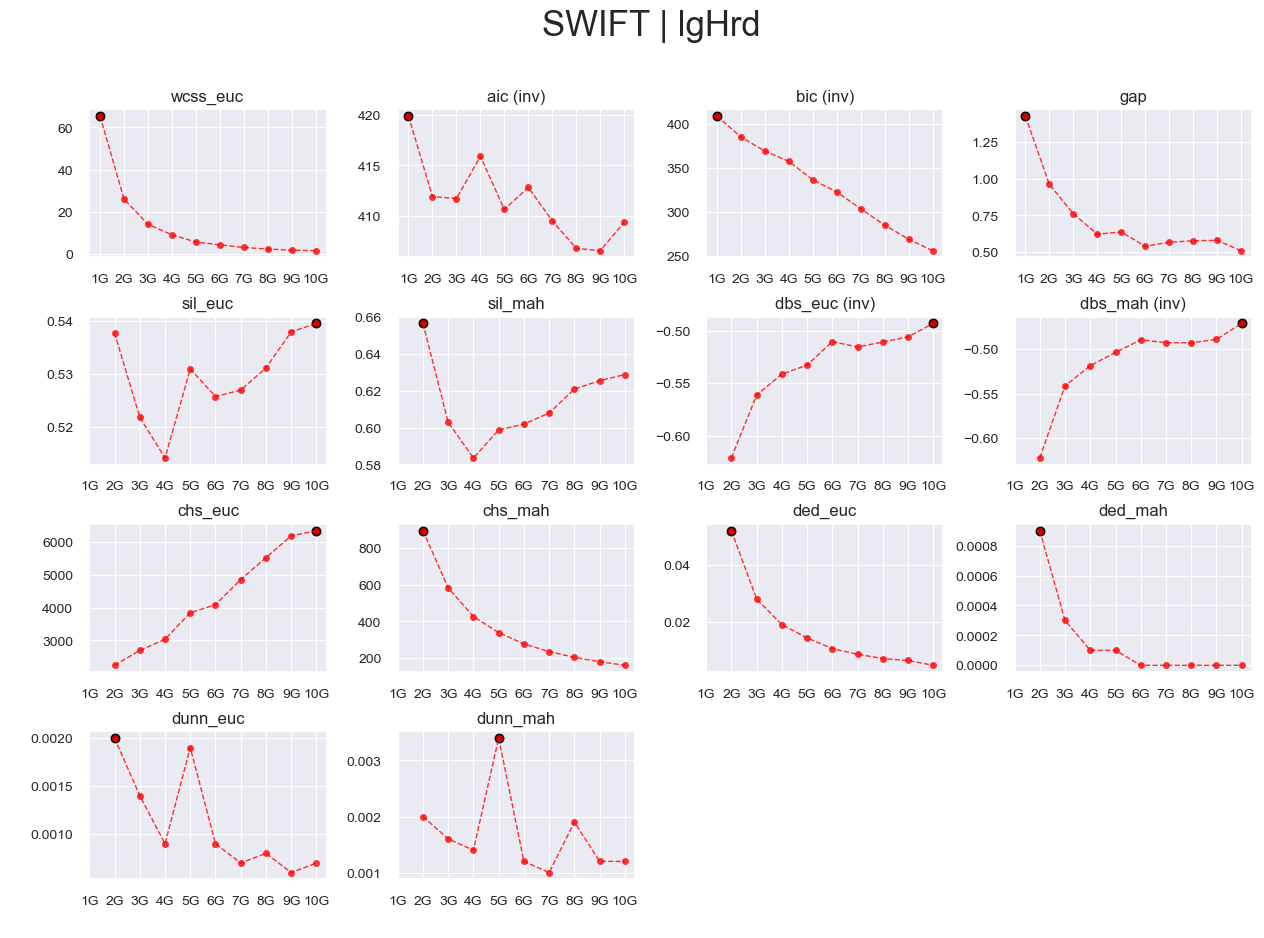

In [126]:
plot_scores("swift", ["lgHrd"])

### d. Luminosity (lgLum)

Load dataset.

[I]: >>> Dataset SWIFT loaded with features: ['lgLum']
[I]:   > Number of GRBs: 463


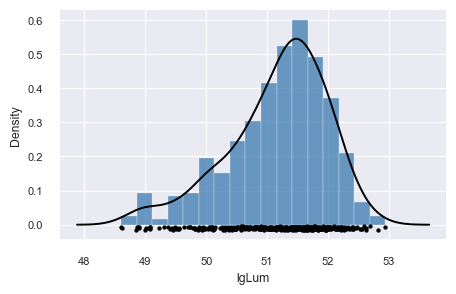

In [127]:
df_swift_lum = dt.load_dataset("swift", ["lgLum"], plot_data=True)

Create models.

In [128]:
models_swift_lum = create_models(df_swift_lum)

[I]: >>> Creating 1G model...
[W]: Model 'swift_lgLum_1G' already created! Skipping...
[I]: >>> Creating 2G model...
[W]: Model 'swift_lgLum_2G' already created! Skipping...
[I]: >>> Creating 3G model...
[W]: Model 'swift_lgLum_3G' already created! Skipping...
[I]: >>> Creating 4G model...
[W]: Model 'swift_lgLum_4G' already created! Skipping...
[I]: >>> Creating 5G model...
[W]: Model 'swift_lgLum_5G' already created! Skipping...
[I]: >>> Creating 6G model...
[W]: Model 'swift_lgLum_6G' already created! Skipping...
[I]: >>> Creating 7G model...
[W]: Model 'swift_lgLum_7G' already created! Skipping...


[I]: >>> Creating 8G model...
[W]: Model 'swift_lgLum_8G' already created! Skipping...
[I]: >>> Creating 9G model...
[W]: Model 'swift_lgLum_9G' already created! Skipping...
[I]: >>> Creating 10G model...
[W]: Model 'swift_lgLum_10G' already created! Skipping...


Display all models.

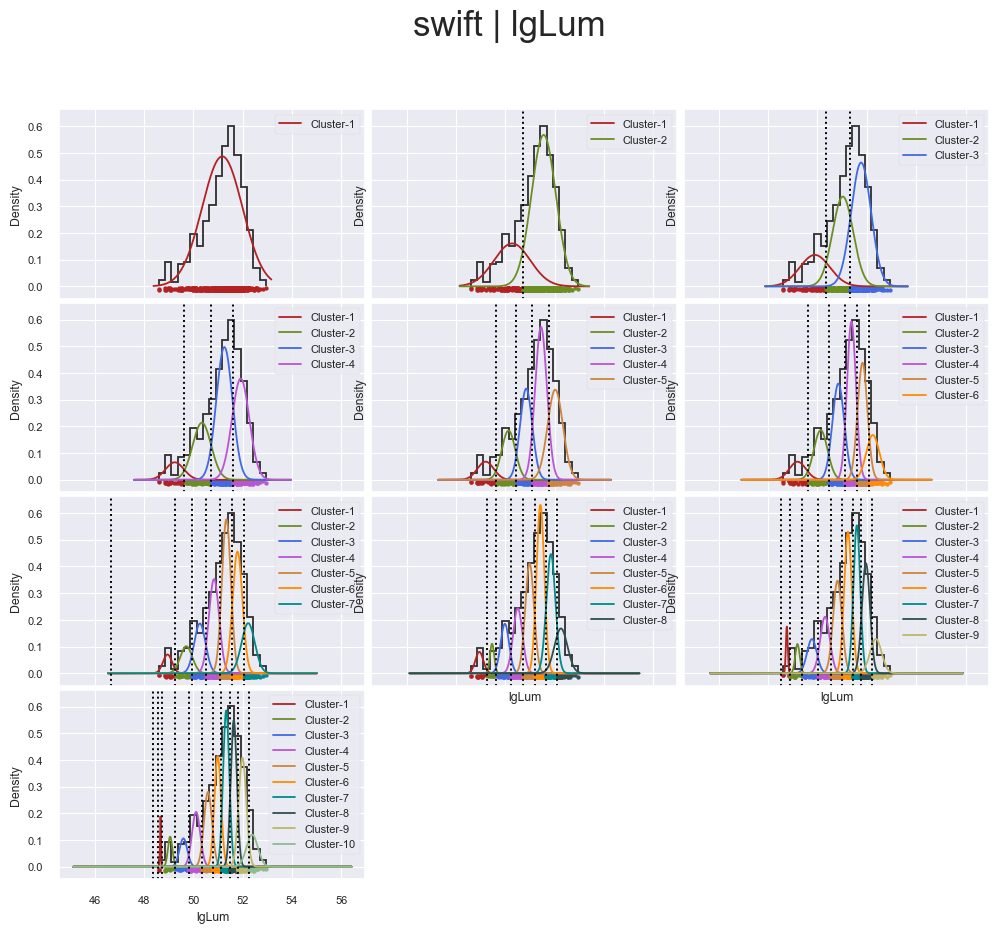

In [129]:
plot_models(models_swift_lum, df_swift_lum)

Evaluate all models.

In [130]:
evaluate_models(models_swift_lum, df_swift_lum, save=True)

[I]: [1/10] Evaluating model: swift_lgLum_1G


[I]: [2/10] Evaluating model: swift_lgLum_2G
[I]: [3/10] Evaluating model: swift_lgLum_3G
[I]: [4/10] Evaluating model: swift_lgLum_4G
[I]: [5/10] Evaluating model: swift_lgLum_5G
[I]: [6/10] Evaluating model: swift_lgLum_6G
[I]: [7/10] Evaluating model: swift_lgLum_7G
[I]: [8/10] Evaluating model: swift_lgLum_8G
[I]: [9/10] Evaluating model: swift_lgLum_9G
[I]: [10/10] Evaluating model: swift_lgLum_10G


Display model scores.

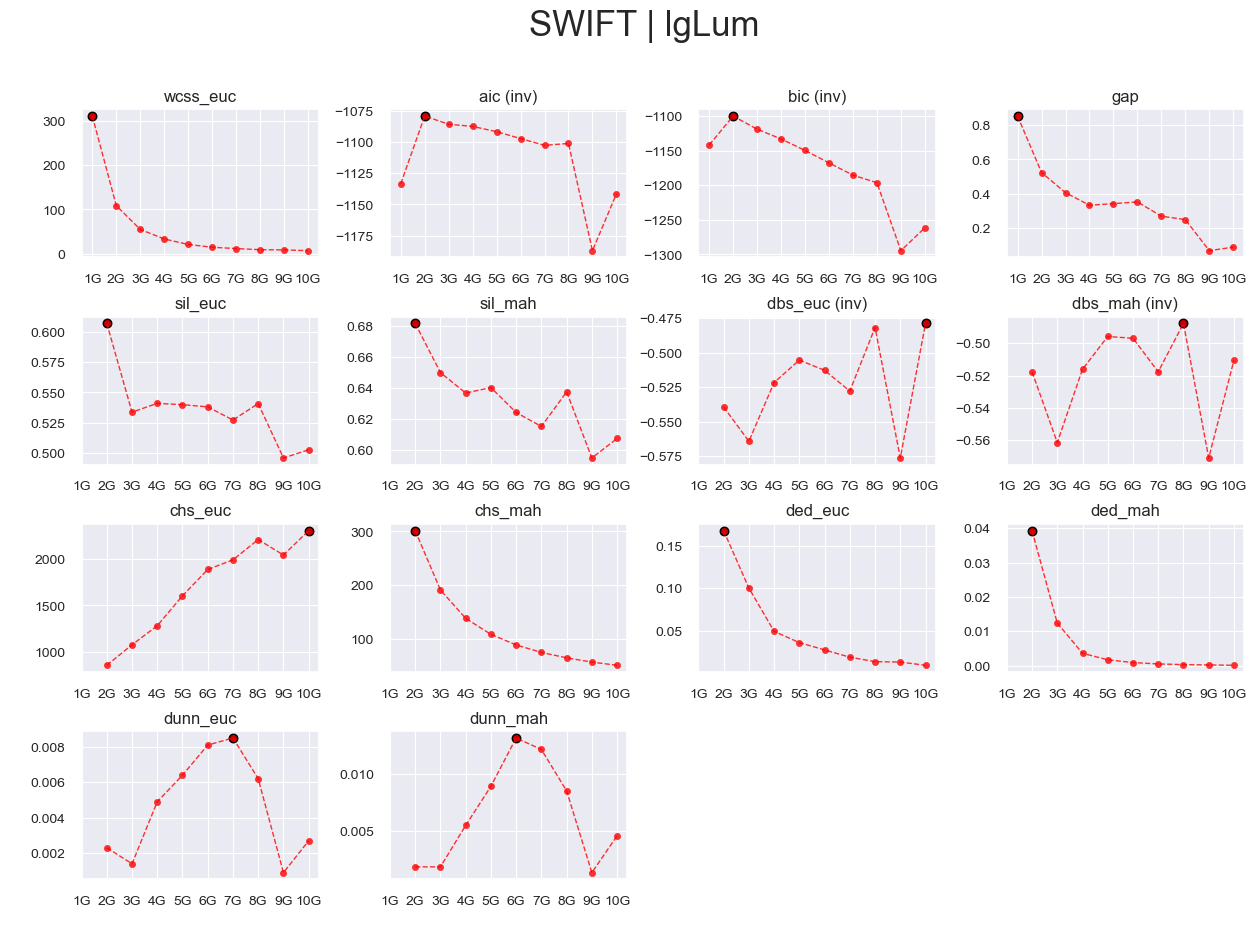

In [131]:
plot_scores("swift", ["lgLum"])

### e. Duration-Spectral Hardness (lgT90-lgHrd)

Load dataset.

[I]: >>> Dataset SWIFT loaded with features: ['lgT90', 'lgHrd']
[I]:   > Number of GRBs: 1470


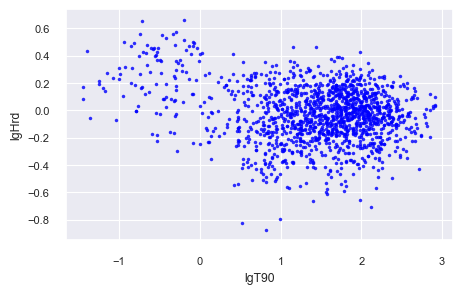

In [132]:
df_swift_t90_hrd = dt.load_dataset("swift", ["lgT90", "lgHrd"], plot_data=True)

Create models.

In [133]:
models_swift_t90_hrd = create_models(df_swift_t90_hrd)

[I]: >>> Creating 1G model...
[W]: Model 'swift_lgT90-lgHrd_1G' already created! Skipping...
[I]: >>> Creating 2G model...
[W]: Model 'swift_lgT90-lgHrd_2G' already created! Skipping...
[I]: >>> Creating 3G model...
[W]: Model 'swift_lgT90-lgHrd_3G' already created! Skipping...
[I]: >>> Creating 4G model...
[W]: Model 'swift_lgT90-lgHrd_4G' already created! Skipping...
[I]: >>> Creating 5G model...
[W]: Model 'swift_lgT90-lgHrd_5G' already created! Skipping...
[I]: >>> Creating 6G model...
[W]: Model 'swift_lgT90-lgHrd_6G' already created! Skipping...
[I]: >>> Creating 7G model...
[W]: Model 'swift_lgT90-lgHrd_7G' already created! Skipping...
[I]: >>> Creating 8G model...
[W]: Model 'swift_lgT90-lgHrd_8G' already created! Skipping...
[I]: >>> Creating 9G model...
[W]: Model 'swift_lgT90-lgHrd_9G' already created! Skipping...
[I]: >>> Creating 10G model...
[W]: Model 'swift_lgT90-lgHrd_10G' already created! Skipping...


Display all models.

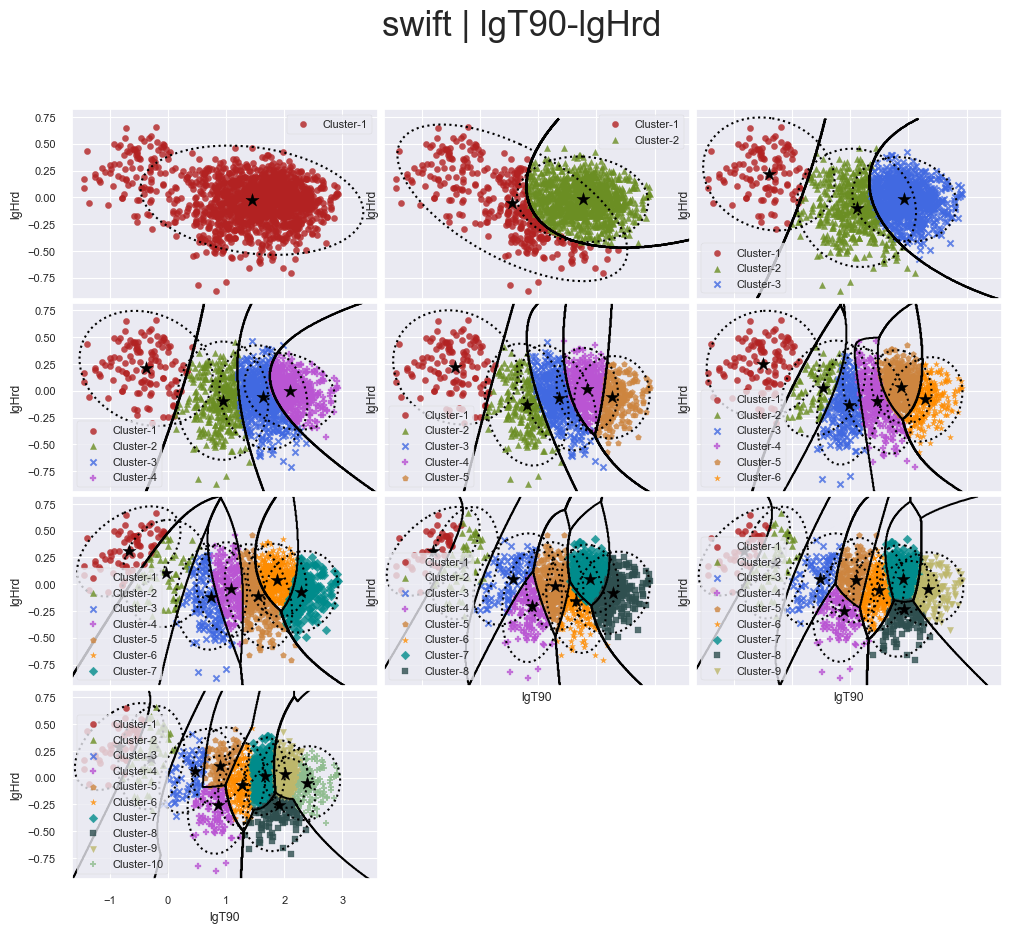

In [134]:
plot_models(models_swift_t90_hrd, df_swift_t90_hrd)

Evaluate all models.

In [135]:
evaluate_models(models_swift_t90_hrd, df_swift_t90_hrd, save=True)

[I]: [1/10] Evaluating model: swift_lgT90-lgHrd_1G


[I]: [2/10] Evaluating model: swift_lgT90-lgHrd_2G
[I]: [3/10] Evaluating model: swift_lgT90-lgHrd_3G
[I]: [4/10] Evaluating model: swift_lgT90-lgHrd_4G
[I]: [5/10] Evaluating model: swift_lgT90-lgHrd_5G
[I]: [6/10] Evaluating model: swift_lgT90-lgHrd_6G
[I]: [7/10] Evaluating model: swift_lgT90-lgHrd_7G
[I]: [8/10] Evaluating model: swift_lgT90-lgHrd_8G
[I]: [9/10] Evaluating model: swift_lgT90-lgHrd_9G
[I]: [10/10] Evaluating model: swift_lgT90-lgHrd_10G


Display model scores.

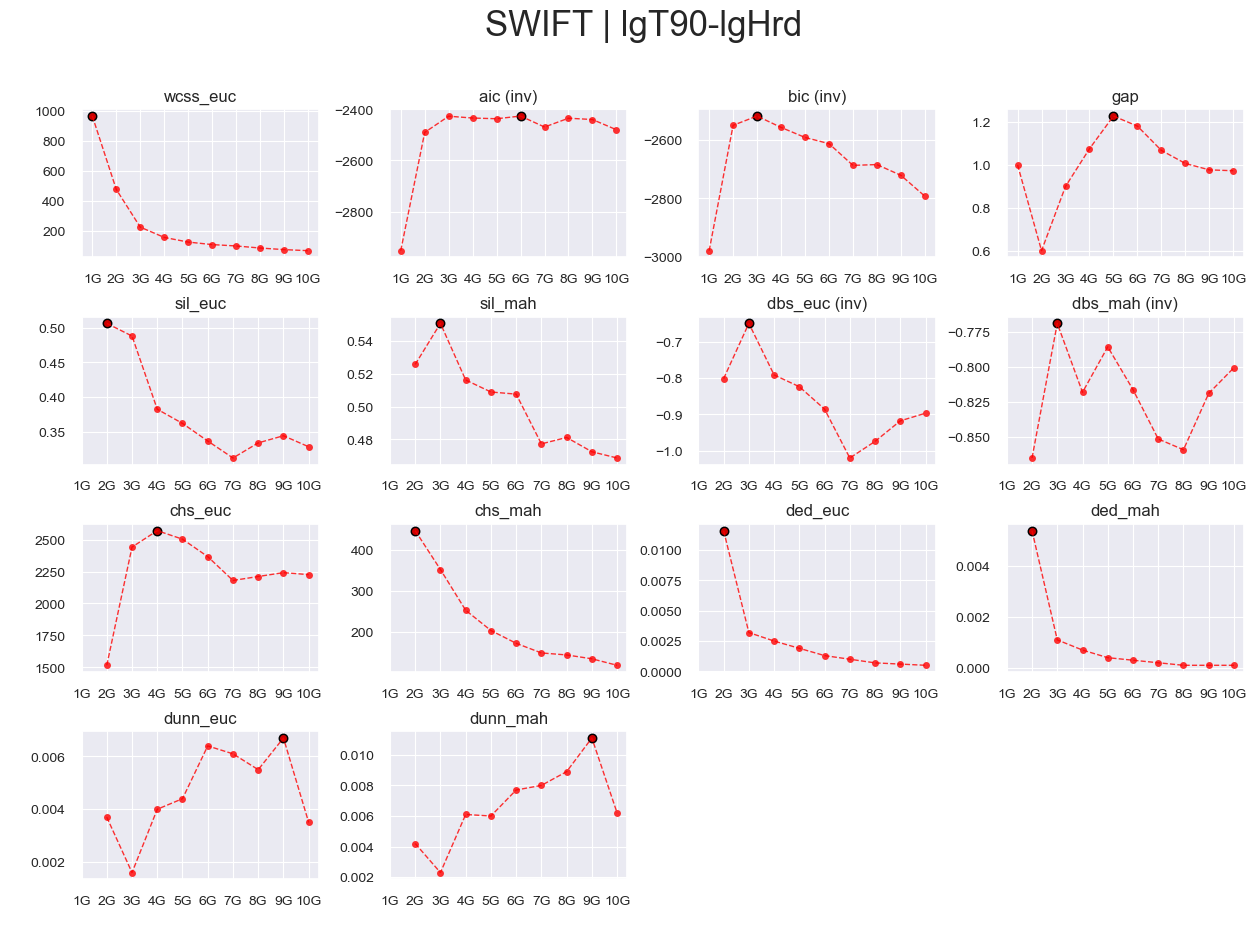

In [136]:
plot_scores("swift", ["lgT90", "lgHrd"])

### f. Intrinsic Duration-Spectral Hardness (lgT90i-lgHrd)

Load dataset.

[I]: >>> Dataset SWIFT loaded with features: ['lgT90i', 'lgHrd']
[I]:   > Number of GRBs: 475


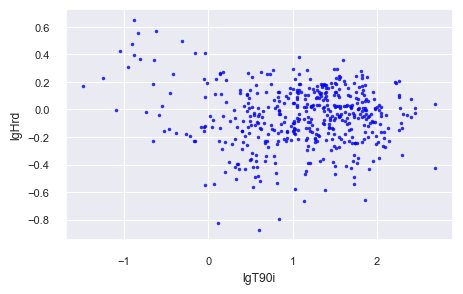

In [137]:
df_swift_t90i_hrd = dt.load_dataset("swift", ["lgT90i", "lgHrd"], plot_data=True)

Create models.

In [138]:
models_swift_t90i_hrd = create_models(df_swift_t90i_hrd)

[I]: >>> Creating 1G model...
[W]: Model 'swift_lgT90i-lgHrd_1G' already created! Skipping...
[I]: >>> Creating 2G model...
[W]: Model 'swift_lgT90i-lgHrd_2G' already created! Skipping...
[I]: >>> Creating 3G model...
[W]: Model 'swift_lgT90i-lgHrd_3G' already created! Skipping...
[I]: >>> Creating 4G model...
[W]: Model 'swift_lgT90i-lgHrd_4G' already created! Skipping...
[I]: >>> Creating 5G model...
[W]: Model 'swift_lgT90i-lgHrd_5G' already created! Skipping...
[I]: >>> Creating 6G model...
[W]: Model 'swift_lgT90i-lgHrd_6G' already created! Skipping...
[I]: >>> Creating 7G model...
[W]: Model 'swift_lgT90i-lgHrd_7G' already created! Skipping...
[I]: >>> Creating 8G model...
[W]: Model 'swift_lgT90i-lgHrd_8G' already created! Skipping...
[I]: >>> Creating 9G model...
[W]: Model 'swift_lgT90i-lgHrd_9G' already created! Skipping...
[I]: >>> Creating 10G model...
[W]: Model 'swift_lgT90i-lgHrd_10G' already created! Skipping...


Display all models.

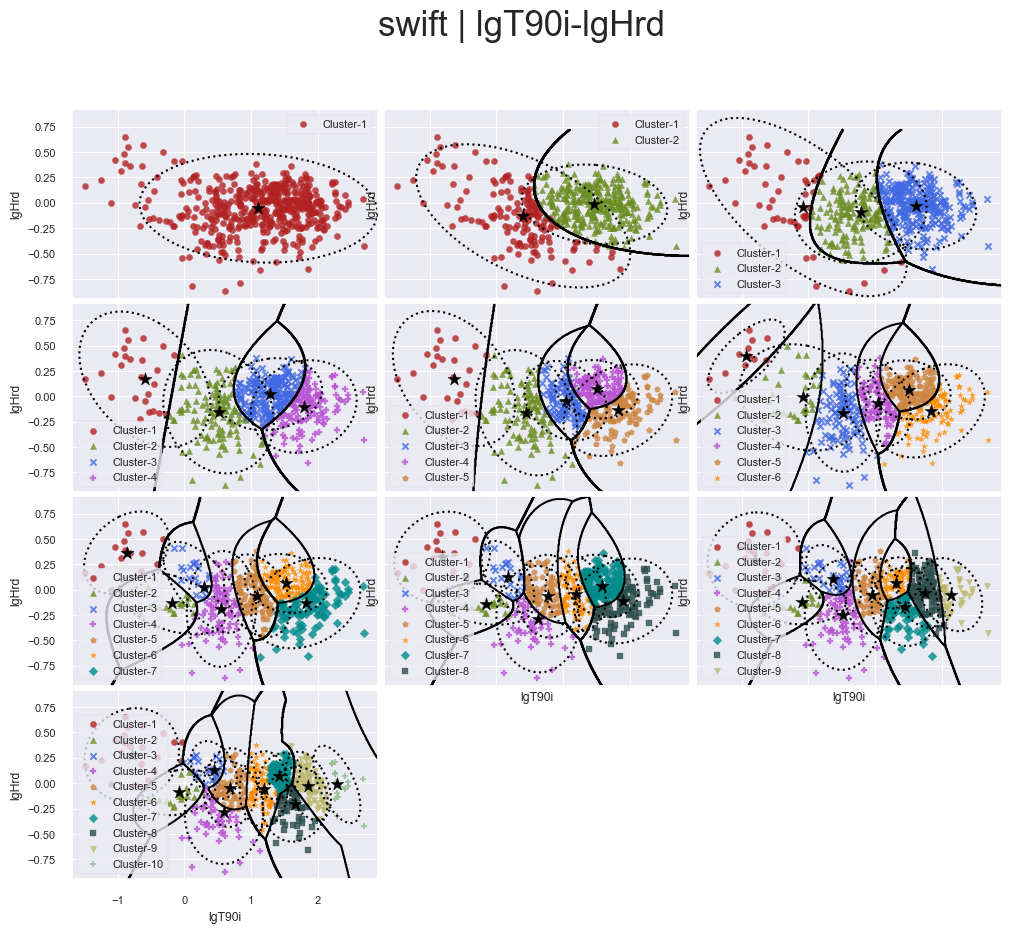

In [139]:
plot_models(models_swift_t90i_hrd, df_swift_t90i_hrd)

Evaluate all models.

In [140]:
evaluate_models(models_swift_t90i_hrd, df_swift_t90i_hrd, save=True)

[I]: [1/10] Evaluating model: swift_lgT90i-lgHrd_1G


[I]: [2/10] Evaluating model: swift_lgT90i-lgHrd_2G
[I]: [3/10] Evaluating model: swift_lgT90i-lgHrd_3G
[I]: [4/10] Evaluating model: swift_lgT90i-lgHrd_4G
[I]: [5/10] Evaluating model: swift_lgT90i-lgHrd_5G
[I]: [6/10] Evaluating model: swift_lgT90i-lgHrd_6G
[I]: [7/10] Evaluating model: swift_lgT90i-lgHrd_7G
[I]: [8/10] Evaluating model: swift_lgT90i-lgHrd_8G
[I]: [9/10] Evaluating model: swift_lgT90i-lgHrd_9G
[I]: [10/10] Evaluating model: swift_lgT90i-lgHrd_10G


Display model scores.

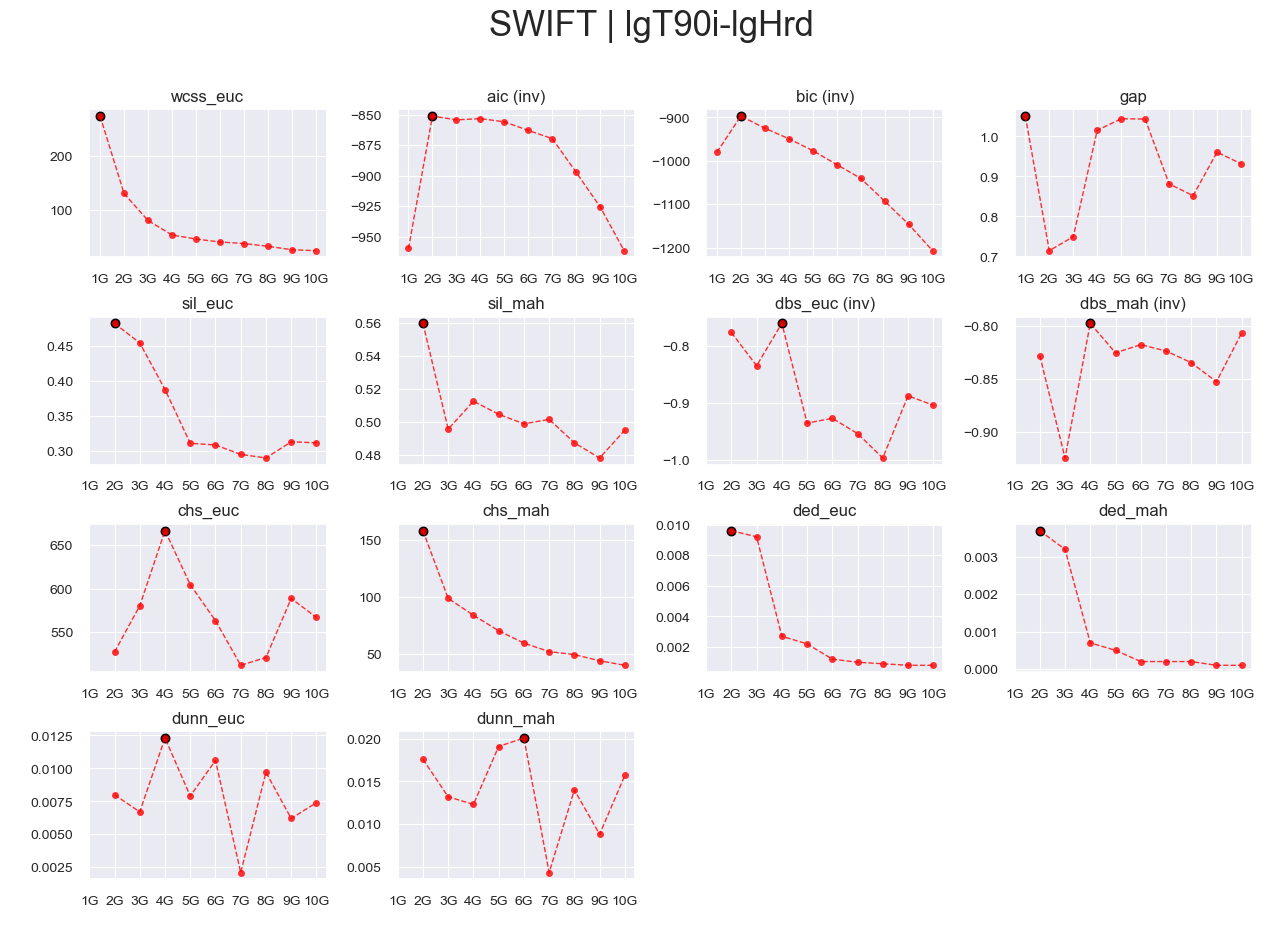

In [141]:
plot_scores("swift", ["lgT90i", "lgHrd"])

### g. Spectral Hardness-Luminosity (lgHrd-lgLum)

Load dataset.

[I]: >>> Dataset SWIFT loaded with features: ['lgHrd', 'lgLum']
[I]:   > Number of GRBs: 466


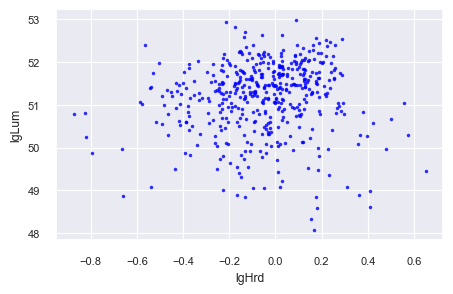

In [142]:
df_swift_hrd_lum = dt.load_dataset("swift", ["lgHrd", "lgLum"], plot_data=True)

Create models.

In [143]:
models_swift_hrd_lum = create_models(df_swift_hrd_lum)

[I]: >>> Creating 1G model...
[W]: Model 'swift_lgHrd-lgLum_1G' already created! Skipping...
[I]: >>> Creating 2G model...
[W]: Model 'swift_lgHrd-lgLum_2G' already created! Skipping...
[I]: >>> Creating 3G model...
[W]: Model 'swift_lgHrd-lgLum_3G' already created! Skipping...
[I]: >>> Creating 4G model...
[W]: Model 'swift_lgHrd-lgLum_4G' already created! Skipping...
[I]: >>> Creating 5G model...
[W]: Model 'swift_lgHrd-lgLum_5G' already created! Skipping...
[I]: >>> Creating 6G model...
[W]: Model 'swift_lgHrd-lgLum_6G' already created! Skipping...
[I]: >>> Creating 7G model...
[W]: Model 'swift_lgHrd-lgLum_7G' already created! Skipping...
[I]: >>> Creating 8G model...
[W]: Model 'swift_lgHrd-lgLum_8G' already created! Skipping...
[I]: >>> Creating 9G model...
[W]: Model 'swift_lgHrd-lgLum_9G' already created! Skipping...
[I]: >>> Creating 10G model...
[W]: Model 'swift_lgHrd-lgLum_10G' already created! Skipping...


Display all models.

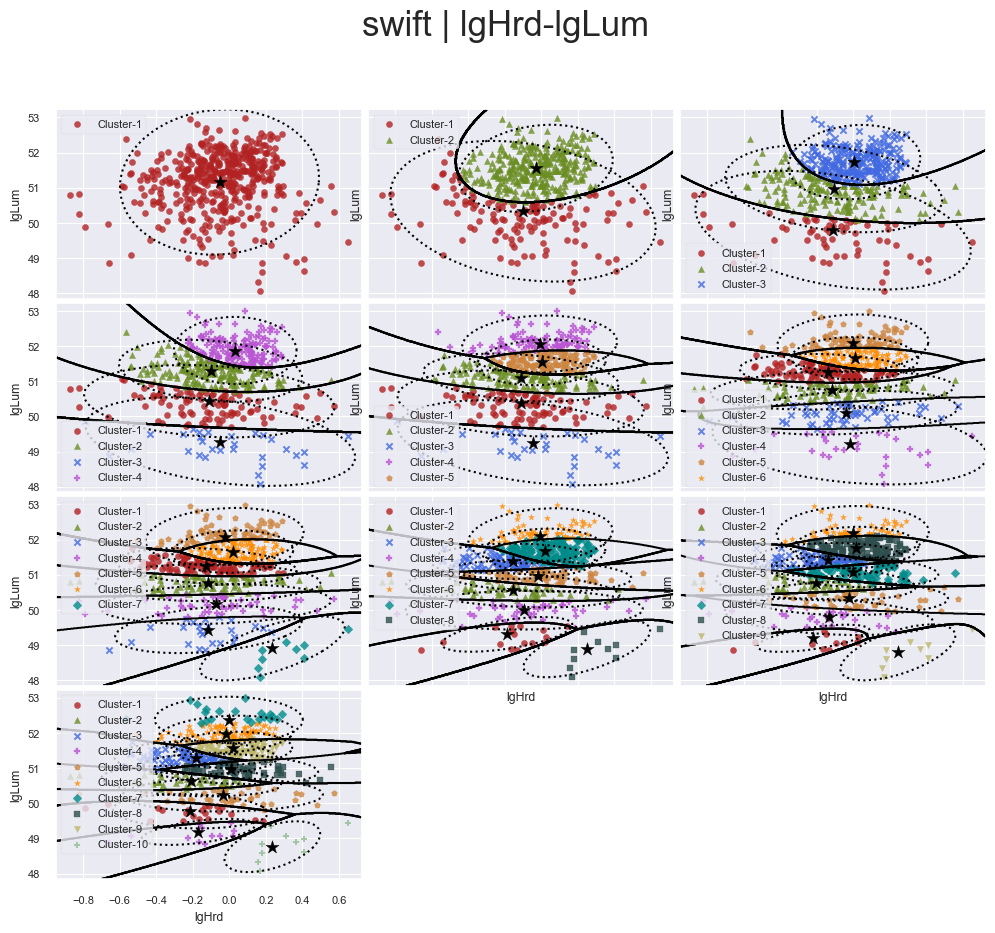

In [144]:
plot_models(models_swift_hrd_lum, df_swift_hrd_lum)

Evaluate all models.

In [145]:
evaluate_models(models_swift_hrd_lum, df_swift_hrd_lum, save=True)

[I]: [1/10] Evaluating model: swift_lgHrd-lgLum_1G


[I]: [2/10] Evaluating model: swift_lgHrd-lgLum_2G
[I]: [3/10] Evaluating model: swift_lgHrd-lgLum_3G
[I]: [4/10] Evaluating model: swift_lgHrd-lgLum_4G
[I]: [5/10] Evaluating model: swift_lgHrd-lgLum_5G
[I]: [6/10] Evaluating model: swift_lgHrd-lgLum_6G
[I]: [7/10] Evaluating model: swift_lgHrd-lgLum_7G
[I]: [8/10] Evaluating model: swift_lgHrd-lgLum_8G
[I]: [9/10] Evaluating model: swift_lgHrd-lgLum_9G
[I]: [10/10] Evaluating model: swift_lgHrd-lgLum_10G


Display model scores.

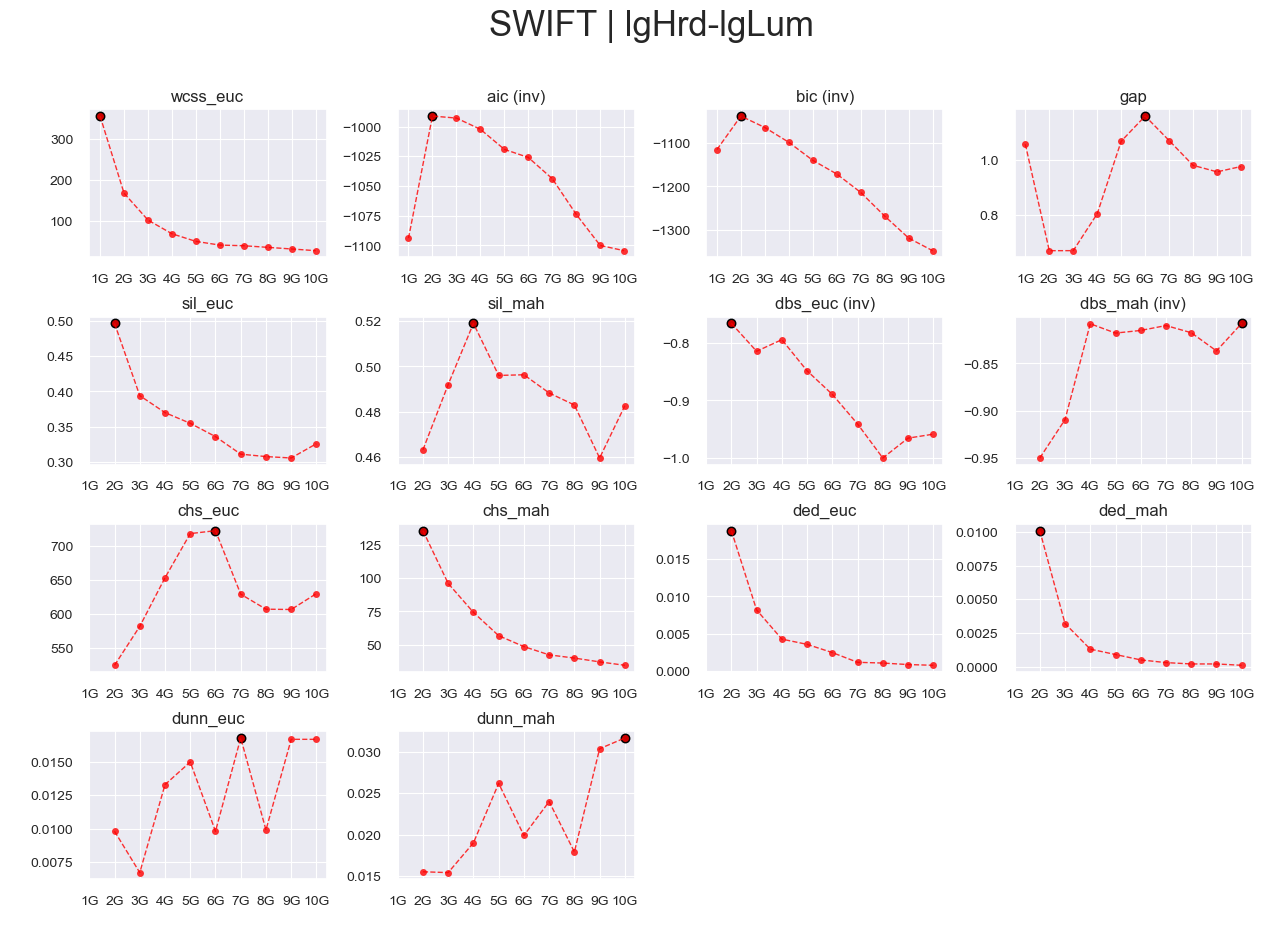

In [146]:
plot_scores("swift", ["lgHrd", "lgLum"])

### h. Intrinsic Duration-Spectral Hardness-Luminosity (lgT90i - lgHrd - lgLum)

Load dataset.

[I]: >>> Dataset SWIFT loaded with features: ['lgT90i', 'lgHrd', 'lgLum']
[I]:   > Number of GRBs: 461


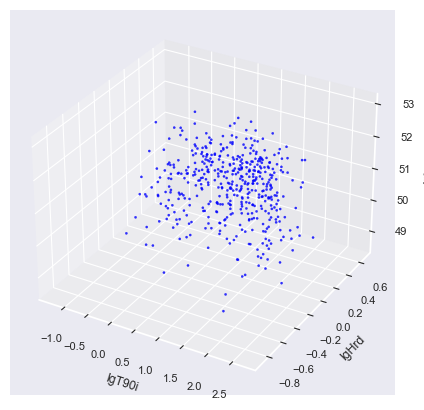

In [147]:
df_swift_t90i_hrd_lum = dt.load_dataset(
    "swift",
    ["lgT90i", "lgHrd", "lgLum"],
    plot_data=True,
    plot_kwargs={"figsize": (5, 5)},
)

Create models.

In [148]:
models_swift_t90i_hrd_lum = create_models(df_swift_t90i_hrd_lum)

[I]: >>> Creating 1G model...
[W]: Model 'swift_lgT90i-lgHrd-lgLum_1G' already created! Skipping...
[I]: >>> Creating 2G model...
[W]: Model 'swift_lgT90i-lgHrd-lgLum_2G' already created! Skipping...
[I]: >>> Creating 3G model...
[W]: Model 'swift_lgT90i-lgHrd-lgLum_3G' already created! Skipping...
[I]: >>> Creating 4G model...
[W]: Model 'swift_lgT90i-lgHrd-lgLum_4G' already created! Skipping...
[I]: >>> Creating 5G model...
[W]: Model 'swift_lgT90i-lgHrd-lgLum_5G' already created! Skipping...
[I]: >>> Creating 6G model...
[W]: Model 'swift_lgT90i-lgHrd-lgLum_6G' already created! Skipping...
[I]: >>> Creating 7G model...
[W]: Model 'swift_lgT90i-lgHrd-lgLum_7G' already created! Skipping...
[I]: >>> Creating 8G model...
[W]: Model 'swift_lgT90i-lgHrd-lgLum_8G' already created! Skipping...
[I]: >>> Creating 9G model...
[W]: Model 'swift_lgT90i-lgHrd-lgLum_9G' already created! Skipping...
[I]: >>> Creating 10G model...
[W]: Model 'swift_lgT90i-lgHrd-lgLum_10G' already created! Skipping..

Display all models.

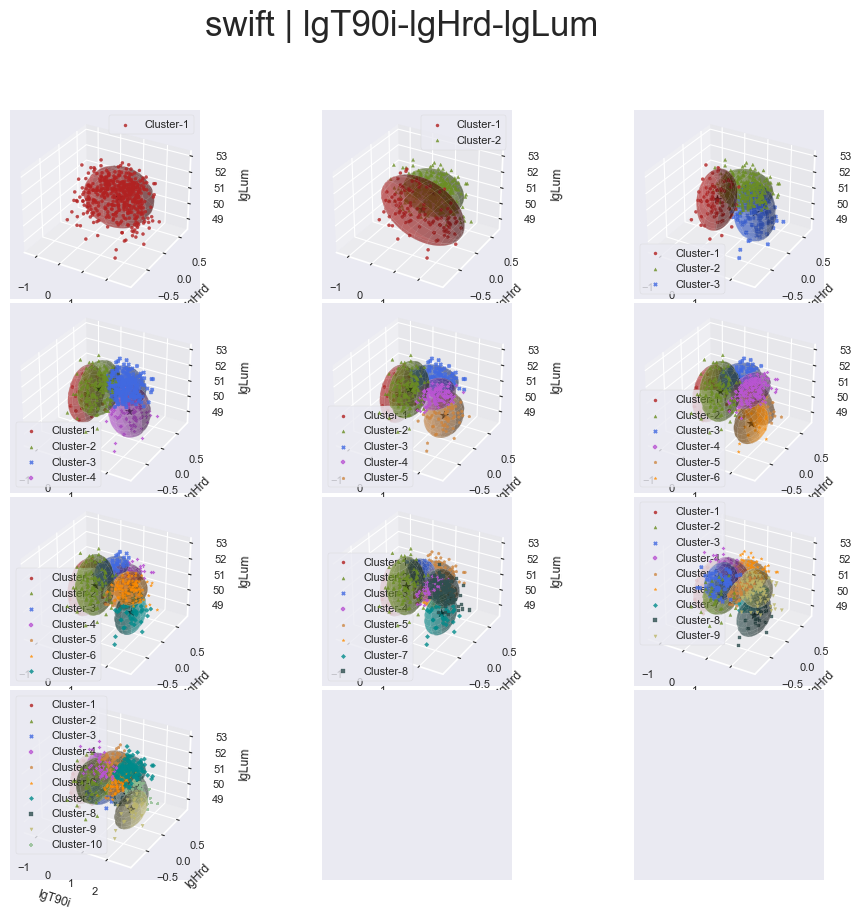

In [149]:
plot_models(models_swift_t90i_hrd_lum, df_swift_t90i_hrd_lum)

Evaluate all models.

In [150]:
evaluate_models(models_swift_t90i_hrd_lum, df_swift_t90i_hrd_lum, save=True)

[I]: [1/10] Evaluating model: swift_lgT90i-lgHrd-lgLum_1G


[I]: [2/10] Evaluating model: swift_lgT90i-lgHrd-lgLum_2G
[I]: [3/10] Evaluating model: swift_lgT90i-lgHrd-lgLum_3G
[I]: [4/10] Evaluating model: swift_lgT90i-lgHrd-lgLum_4G
[I]: [5/10] Evaluating model: swift_lgT90i-lgHrd-lgLum_5G
[I]: [6/10] Evaluating model: swift_lgT90i-lgHrd-lgLum_6G
[I]: [7/10] Evaluating model: swift_lgT90i-lgHrd-lgLum_7G
[I]: [8/10] Evaluating model: swift_lgT90i-lgHrd-lgLum_8G
[I]: [9/10] Evaluating model: swift_lgT90i-lgHrd-lgLum_9G
[I]: [10/10] Evaluating model: swift_lgT90i-lgHrd-lgLum_10G


Display model scores.

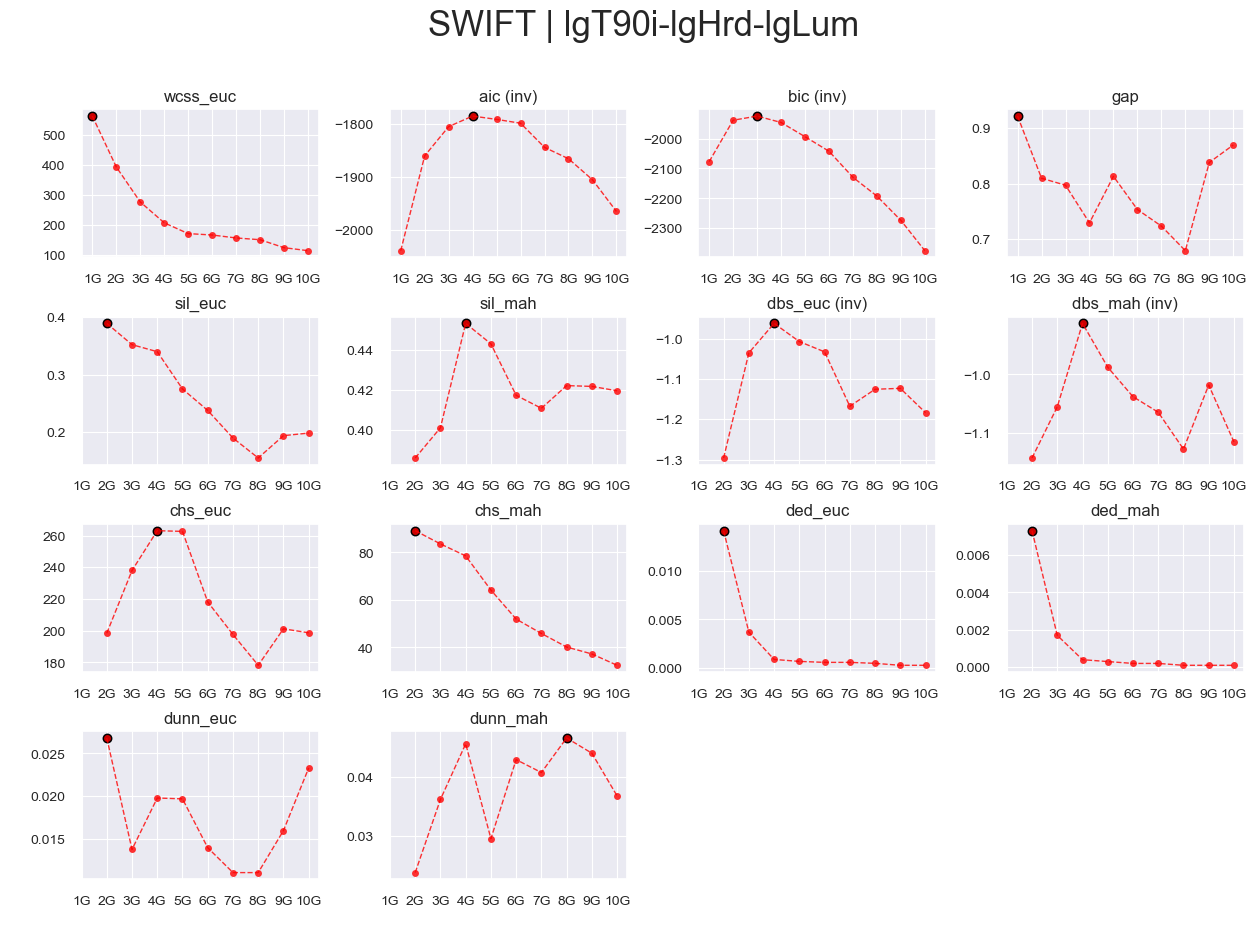

In [151]:
plot_scores("swift", ["lgT90i", "lgHrd", "lgLum"])

-----